## Exercise 1: Bayesian Inference for Poisson model

A quality control engineer works at a factory that produces washing machines. The
number of defective washing machines manufactured each day follows a Poisson distribution with an unknown rate parameter µ. The objective of the engineer is to estimate
µ based on observed data and prior knowledge. Over the next 5 days, he observes the
following number of defective products: x = (3, 0, 1, 5, 2). \
a) Assuming a positive uniform prior distribution for the parameter µ
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R


The assumed prior distributiom for the mean $\mu$ is a $Gamma(1,0)$. The posterior is the conjugate distribution $Gamma(\alpha,\lambda)$, with $\alpha= 1+\sum_{i=0}^{n} x_i = 12$ and $\lambda=n=5$.

The expected value for $\mu$ and its variance are:\
$$E[\mu|\{x_i\}]= \alpha / \lambda = 12/5$$  $$var[\mu|\{x_i\}]= \alpha/\lambda^2 = 12/25 $$

The mean value of the posterior is 2.4 with variance 0.48 
The median value of the posterior is 2.133704

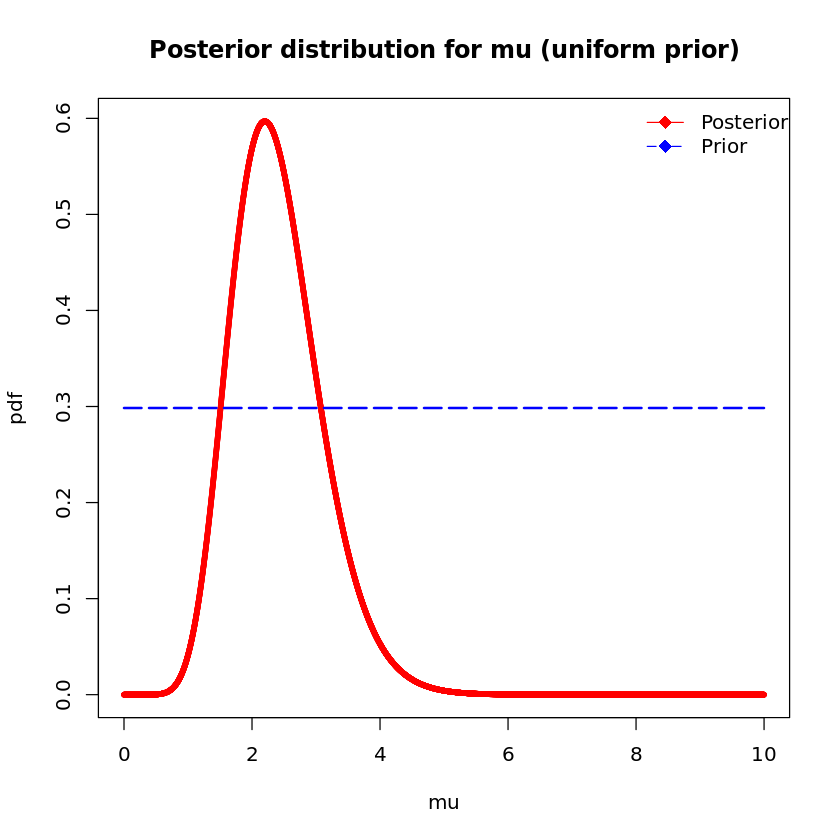

In [1]:
x <- seq(from=0, by=0.001,length.out=10000)
mu_post = dgamma(x,12,5)
mu_prior = dgamma(x,1,0)
plot(x=x,y=mu_post,type='p',col='red',
    xlab = "mu",
    cex = 0.5, 
    ylab = "pdf",
    main = "Posterior distribution for mu (uniform prior)")

par(new = TRUE)  # overlay

plot(x=x,y=mu_prior,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

legend("topright",
       legend = c("Posterior", "Prior"),
       col = c("red", "blue"),
       pch = c(18, 18),
       lty = c(1,5),
       pt.cex = c(1.5, 1.5),
       bty = "n")

mu = sum(mu_post*x*0.001) 
mu_var = sum(mu_post*(x)**2*0.001)- mu**2 # var(x)= E(x^2)-E(x)^2

median = qgamma(0.5,11,5) # quantile gamma function

cat('The mean value of the posterior is',mu,'with variance',mu_var,'\n')
cat('The median value of the posterior is',median)

b) Taking into account that historical data from similar factories, suggesting that the rate
of defective washing machines is around 2 per day, with standard deviation of 1,
model your belief using the suitable Gamma prior and then
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R.

Our prior can be model as a Gamma distribution $Gamma(\alpha,\lambda)$ with mean $m=2$ and variance $s^2=1$. Thus the parameters of the prior Gamma distribution are:
$\lambda= m/s^2 = 2$ and $\alpha= (m/s)^2= 4$. 

Thus, the posterior distribution of the mean $\mu$ is $Gamma(\alpha',\lambda')$, with $\alpha'= \alpha + \sum_{i=0}^{n} x_i = 15 $,$\lambda'= \lambda + n = 7$.  

The expected value for $\mu$ and its variance are:\
$$E[\mu|\{x_i\}]= \alpha' / \lambda' = 15/7$$  $$var[\mu|\{x_i\}]= \alpha'/(\lambda')^2 = 15/49 $$



The mean value of the posterior is 2.142857 with variance 0.3061224 
The median value of the posterior is 2.095431

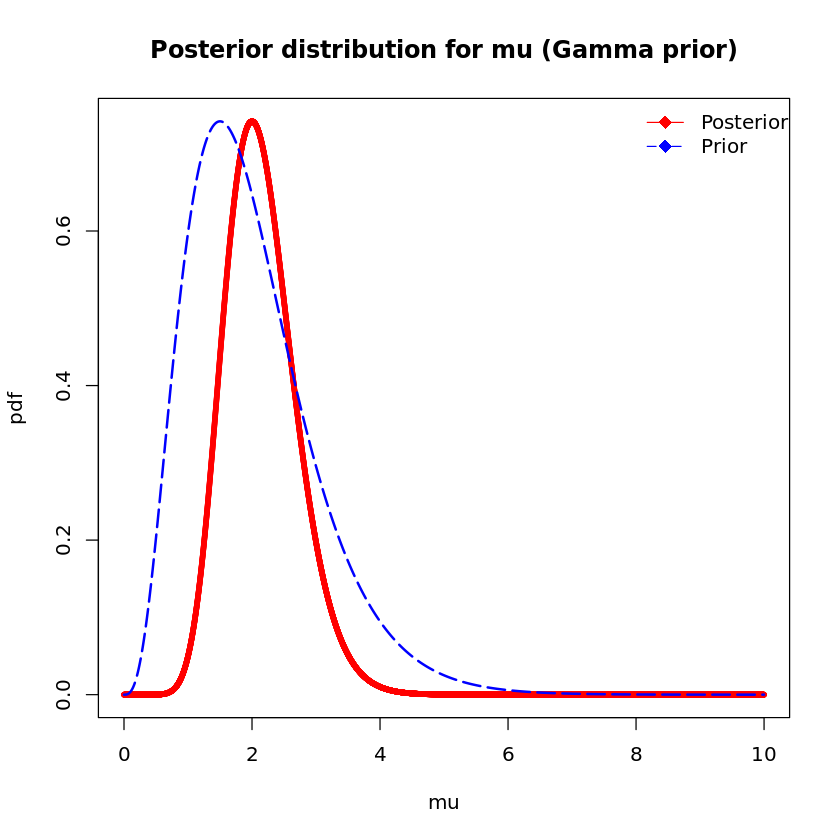

In [37]:
x <- seq(from=0, by=0.001,length.out=10000)
mu_post_new = dgamma(x,15,7)
mu_prior_new = dgamma(x,4,2)
plot(x=x,y=mu_post_new,type='p',col='red',
    xlab = "mu",
    ylab = "pdf", 
    cex = 0.5, 
    main = "Posterior distribution for mu (Gamma prior)")

par(new = TRUE)  # overlay

plot(x=x,y=mu_prior_new,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

legend("topright",
       legend = c("Posterior", "Prior"),
       col = c("red", "blue"),
       pch = c(18, 18),
       lty = c(1,5),
       pt.cex = c(1.5, 1.5),
       bty = "n")

mu = sum(mu_post_new*x*0.001) 
mu_var = sum(mu_post_new*(x)**2*0.001)- mu**2 # var(x)= E(x^2)-E(x)^2

median = qgamma(0.5,15,7) # quantile gamma function

cat('The mean value of the posterior is',mu,'with variance',mu_var,'\n')
cat('The median value of the posterior is',median)

c) Evaluate a 95% credibility interval for the results obtained with different priors (you
can also try with other priors). In addition, compare the results obtained using a
Gamma posterior distribution, with a normal approximation that matches the same
mean and standard deviation.


Credibility interval with uniform prior: [ 1.098232 ; 3.678071 ]

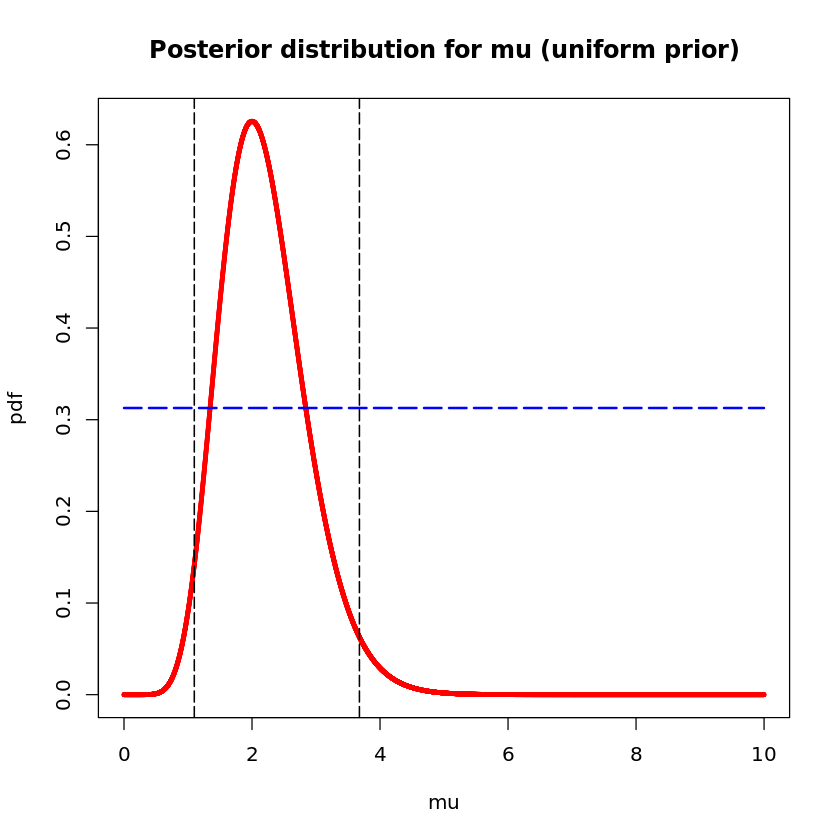

Credibility interval with Gamma prior: [ 1.199341 ; 3.35566 ]

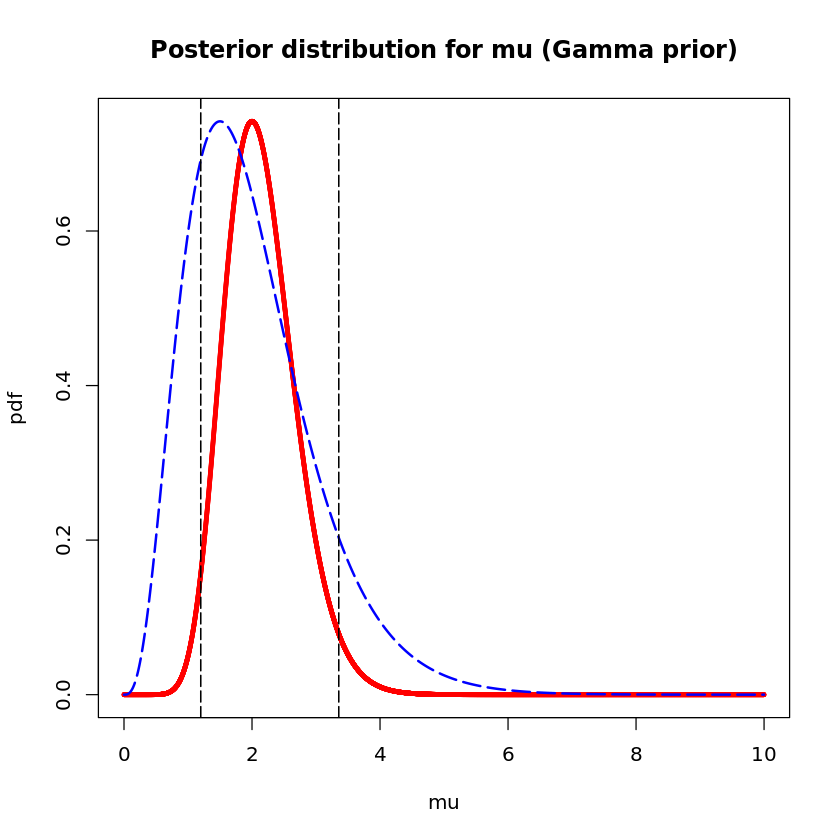

In [58]:
lower_unif <- qgamma(0.025,11,5)
upper_unif <- qgamma(0.975,11,5)

lower_gamma <- qgamma(0.025,15,7)
upper_gamma <- qgamma(0.975,15,7)


x <- seq(from=0, by=0.001,length.out=10000)

plot(x=x,y=mu_post,type='p',col='red',
    xlab = "mu",
    cex = 0.4, 
    ylab = "pdf",
    main = "Posterior distribution for mu (uniform prior)")

par(new = TRUE) 
plot(x=x,y=mu_prior,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

abline(v = lower_unif, col = "black", lty = 5, lwd = 1.25)
abline(v = upper_unif, col = "black", lty = 5, lwd = 1.25)

cat('Credibility interval with uniform prior: [',lower_unif,';',upper_unif,']')


plot(x=x,y=mu_post_new,type='p',col='red',
    xlab = "mu",
    ylab = "pdf", 
    cex = 0.4, 
    main = "Posterior distribution for mu (Gamma prior)")

par(new = TRUE)  # overlay
plot(x=x,y=mu_prior_new,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

abline(v = lower_gamma, col = "black", lty = 5, lwd = 1.25)
abline(v = upper_gamma, col = "black", lty = 5, lwd = 1.25)

cat('Credibility interval with Gamma prior: [',lower_gamma,';',upper_gamma,']')

Using a Gaussian approximation for the Gamma posterior distribution we would get:

The mean value of the posterior is 2.200079 with variance 0.4396252 
The median value of the posterior is 2.2 
Credibility interval with uniform prior: [ 0.899907 ; 3.500093 ]

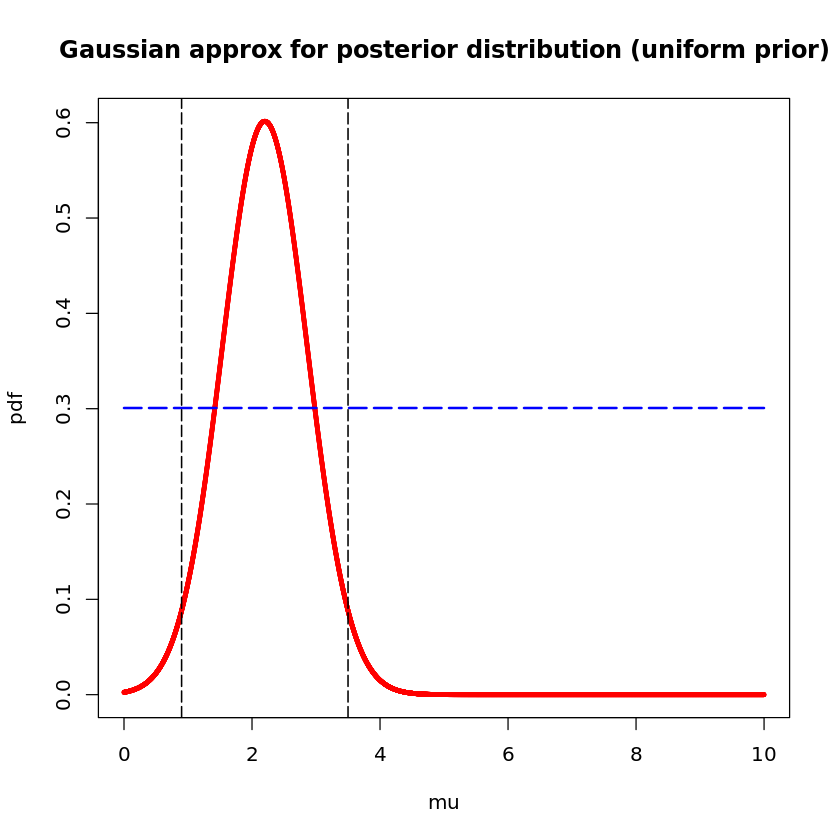

In [69]:
# uniform prior
x <- seq(from=0, by=0.001,length.out=10000)

mu_post = dnorm(x,11/5,(11/25)^0.5) # gaussian with mean=alpha/lambda,var=alpha/lambda^2
mu_prior = dgamma(x,1,0)

mu = sum(mu_post*x*0.001) 
mu_var = sum(mu_post*(x)**2*0.001)- mu**2 # var(x)= E(x^2)-E(x)^2

median = qnorm(0.5,11/5,(11/25)^0.5)

lower_unif = qnorm(0.025,11/5,(11/25)^0.5)
upper_unif = qnorm(0.975,11/5,(11/25)^0.5)


plot(x=x,y=mu_post,type='p',col='red',
    xlab = "mu",
    cex = 0.4, 
    ylab = "pdf",
    main = "Gaussian approx for posterior distribution (uniform prior)")

par(new = TRUE) 
plot(x=x,y=mu_prior,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

abline(v = lower_unif, col = "black", lty = 5, lwd = 1.25)
abline(v = upper_unif, col = "black", lty = 5, lwd = 1.25)


cat('The mean value of the posterior is',mu,'with variance',mu_var,'\n')
cat('The median value of the posterior is',median,'\n')
cat('Credibility interval with uniform prior: [',lower_unif,';',upper_unif,']')

The mean value of the posterior is 2.142864 with variance 0.3060912 
The median value of the posterior is 2.142857 
Credibility interval with uniform prior: [ 1.058442 ; 3.227273 ]

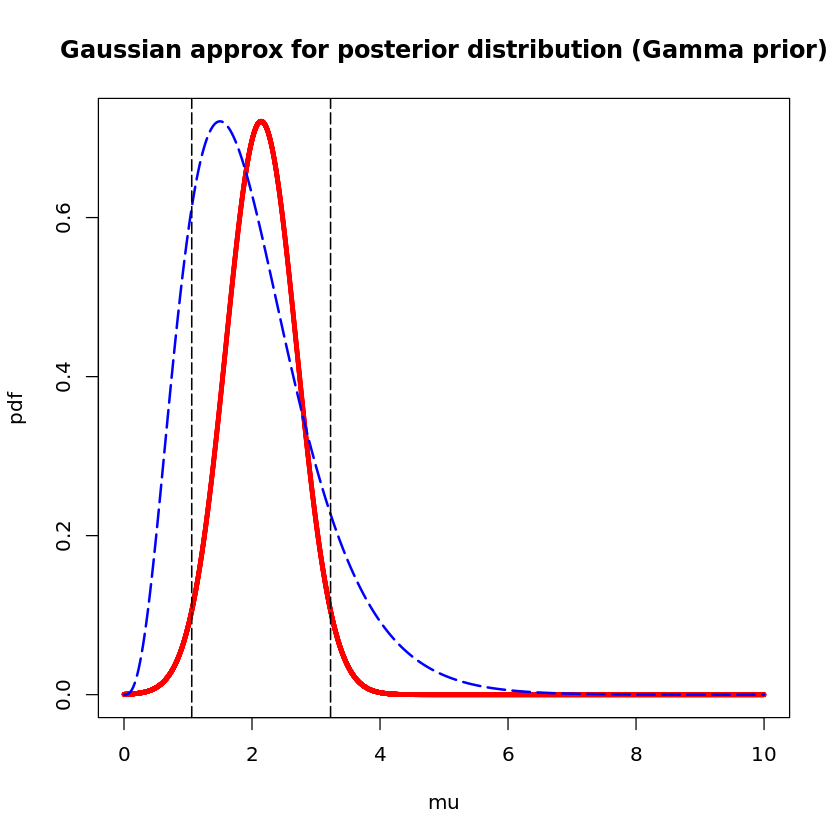

In [70]:
# Gamma prior

mu_post_new = dnorm(x,15/7,(15/49)^0.5) # gaussian with mean=alpha/lambda,var=alpha/lambda^2
mu_prior_new = dgamma(x,4,2)

mu = sum(mu_post_new*x*0.001) 
mu_var = sum(mu_post_new*(x)**2*0.001)- mu**2 

median = qnorm(0.5,15/7,(15/49)^0.5)

lower_gamma = qnorm(0.025,15/7,(15/49)^0.5)
upper_gamma = qnorm(0.975,15/7,(15/49)^0.5)


plot(x=x,y=mu_post_new,type='p',col='red',
    xlab = "mu",
    cex = 0.4, 
    ylab = "pdf",
    main = "Gaussian approx for posterior distribution (Gamma prior)")

par(new = TRUE) 
plot(x=x,y=mu_prior_new,type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

abline(v = lower_gamma, col = "black", lty = 5, lwd = 1.25)
abline(v = upper_gamma, col = "black", lty = 5, lwd = 1.25)


cat('The mean value of the posterior is',mu,'with variance',mu_var,'\n')
cat('The median value of the posterior is', median,'\n')
cat('Credibility interval with uniform prior: [',lower_gamma,';',upper_gamma,']')

## Exercise 2: Efficiency using Bayesian approach

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose,
he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1
and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and
r be those also recorded by Det2, researcher A obtains n = 20 and r = 12. Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,

a) Evaluate the mean and the standard deviation using a Bayesian approach under the
hypothesis of: \
– uniform prior $ ∼ U(0, 1)$ \
– Jeffrey’s prior $∼ Beta(1/2, 1/2)$

- 1 Uniform prior:

A uniform prior can be thought as a Beta distribution $Beta(1,1)$. Thus, the posterior distribution for the probability of success ( the efficiency $p$ of Det2) is the conjugate Beta distribution $Beta(\alpha,\beta)$, with $\alpha=r+1=13$, $\beta=n-r+1=9$. 

So the mean and standard deviation for the efficiency $p$, assuming a uniform prior are: 

$$ E[p|r,n]= \frac{\alpha}{\alpha+\beta}= \frac{r+1}{n+2}= 13/22$$
$$ \sigma(p|r,n)= \sqrt( \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} ) \approx 0.103 $$

Numerically:


In [114]:
x=seq(0,1,by=0.0001)
p_post = dbeta(x,13,9)

mean = 0.0001*sum(x*p_post)
var =  0.0001*sum(x**2*p_post) - mean**2
cat("The mean of the posterior of the efficiency is",mean,'with standard deviation',var**0.5)

The mean of the posterior of the efficiency is 0.5909091 with standard deviation 0.1025195

- 2 Jeffrey's prior:

Using a Jeffrey's prior, the posterior distribution for the efficiency is $Beta(\alpha,\beta)$, with $\alpha=r+1/2=12.5$,$\beta= n-r+1/2=8.5$. So the mean and standard deviation for the efficiency $p$ are: 

$$ E[p|r,n]= \frac{\alpha}{\alpha+\beta}= 25/42$$
$$ \sigma(p|r,n)= \sqrt( \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} ) \approx 0.105$$

Numerically:
 

In [115]:
p_post_j = dbeta(x,12.5,8.5)

mean_j = 0.0001*sum(x*p_post_j)
var_j =  0.0001*sum(x**2*p_post_j) - mean_j**2
cat("The mean of the posterior of the efficiency is",mean_j,'with standard deviation',var_j**0.5)

The mean of the posterior of the efficiency is 0.5952381 with standard deviation 0.1046487

b) Plot the posterior distributions for both cases

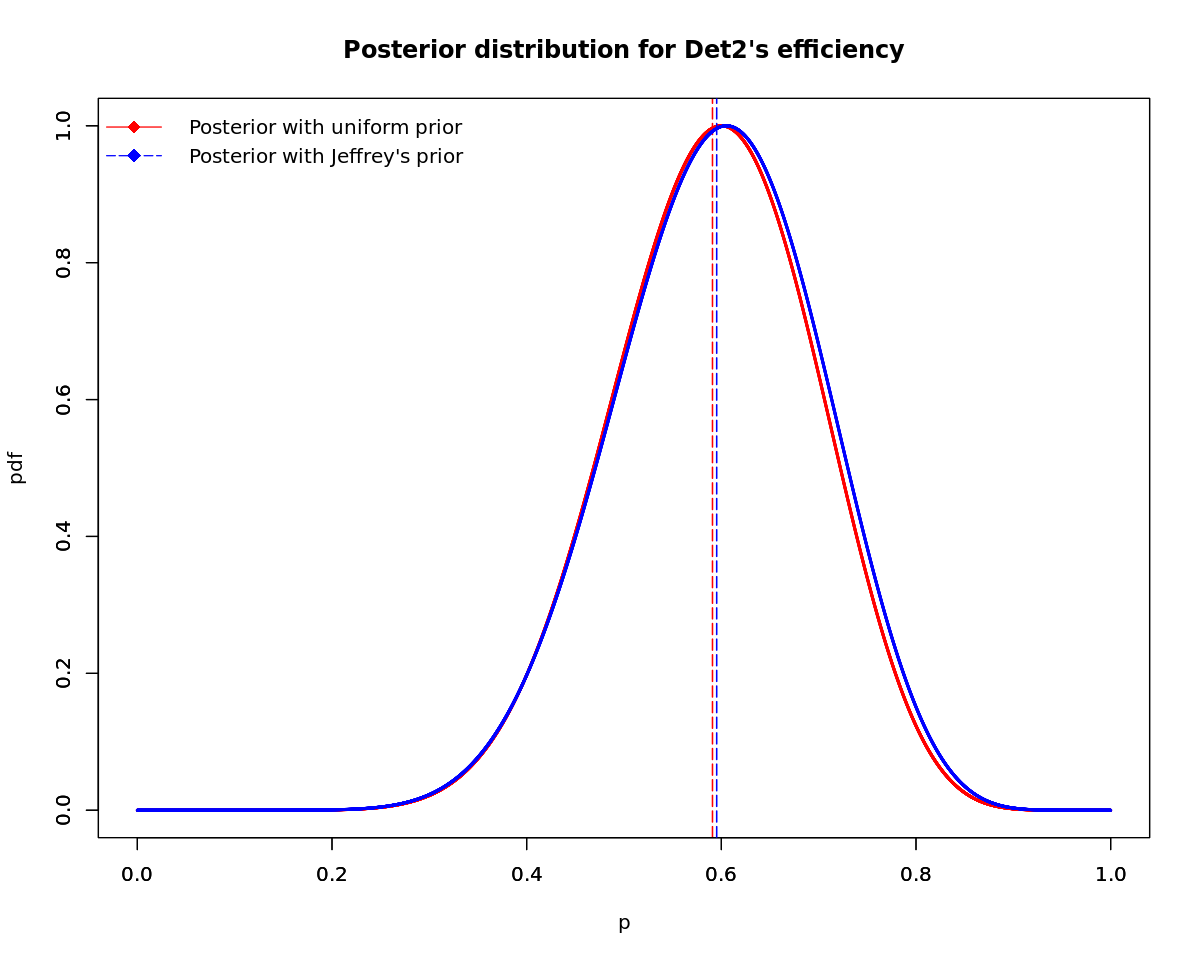

In [122]:
plot(x=x,y=p_post/max(p_post),type='p',col='red',
    xlab = "p",
    cex = 0.2, 
    ylab = "pdf",
    main = "Posterior distribution for Det2's efficiency")

abline(v = mean, col = "red", lty = 5, lwd = 1.25)

par(new=TRUE)

plot(x=x,y=p_post_j/max(p_post_j),type='p',col='blue',
    xlab = "",
    cex = 0.2, 
    ylab = "",
    main = "")

abline(v = mean_j, col = "blue", lty = 5, lwd = 1.25)

legend("topleft",
       legend = c("Posterior with uniform prior", "Posterior with Jeffrey's prior"),
       col = c("red", "blue"),
       pch = c(18, 18),
       lty = c(1,5),
       pt.cex = c(1.5, 1.5),
       bty = "n")

Taking into account that the same detector has been studied by researcher B, who has
performed only n = 10 measurements and has obtained r = 10 signals,\
c) Evaluate the mean, the standard deviation and the posterior distribution using a
uniform prior with the results of researcher B.

The posterior distribution for the efficiency $p$ of Det2 according to reasercher B is $Beta(\alpha,\beta)$, with $\alpha=r+1=11$ and $\beta=n-r+1=1$. 

So the mean and standard deviation for the efficiency $p$, assuming a uniform prior are: 

$$ E[p|r,n]= \frac{\alpha}{\alpha+\beta}= 11/12$$
$$ \sigma(p|r,n)= \sqrt( \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} ) \approx 0.0767 $$

In [103]:
p_post_j = dbeta(x,11,1)

mean_b = 0.0001*sum(x*p_post_j)
var_b =  0.0001*sum(x**2*p_post_j) - mean_b**2
cat("The mean of the posterior of the efficiency for rearcher B is",mean_b,', with standard deviation',var_b**0.5)

The mean of the posterior of the efficiency for rearcher B is 0.9172168 , with standard deviation 0.0736027

d) Repeat the computation of points a) and b) with the data of researcher A using as a
prior the posterior obtained from point c).

Now the prior distribution for p is $Beta(11,1)$. Thus, the new posterior distribution for researcher A will be $Beta(\alpha,\beta)$, with $\alpha=r+11=23$ and $\beta=n-r+1=9$. So the new mean and standard deviation for the efficiency $p$ are: 

$$ E[p|r,n]= \frac{\alpha}{\alpha+\beta}= 23/32$$
$$ \sigma(p|r,n)= \sqrt( \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} ) \approx 0.0783$$
 

e) Compute 95% credible interval using the posterior of the previous point d)

The mean value of the posterior is 0.71875 with standard deviation 0.07826692 
95% credibility interval: [ 0.5538661 ; 0.8577715 ]

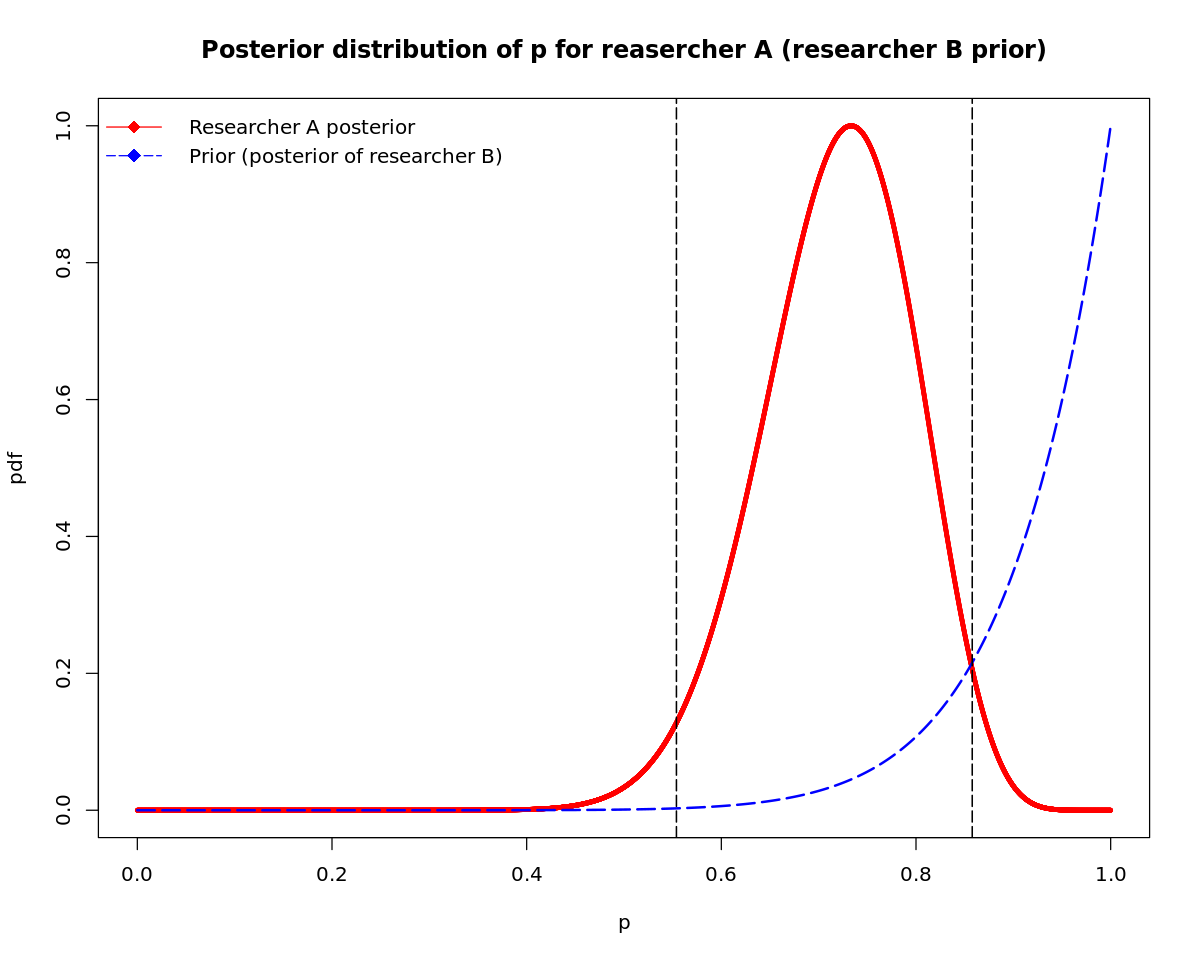

In [113]:
p_post = dbeta(x,23,9) 
p_prior = dbeta(x,11,1)

mean_p = 0.0001*sum(x*p_post)
var_p =  0.0001*sum(x**2*p_post) - mean_p**2


lower_p = qbeta(0.025,23,9)
upper_p = qbeta(0.975,23,9)

options(repr.plot.width = 10, repr.plot.height = 8)

plot(x=x,y=p_post/max(p_post),type='p',col='red',
    xlab = "p",
    cex = 0.4, 
    ylab = "pdf",
    main = "Posterior distribution of p for reasercher A (researcher B prior)")

par(new = TRUE) 
plot(x=x,y=p_prior/max(p_prior),type='l',lty=5,col='blue',
    axes = FALSE, xlab = "", ylab = "",
    cex = 0.75,lwd=2)

abline(v = lower_p, col = "black", lty = 5, lwd = 1.25)
abline(v = upper_p, col = "black", lty = 5, lwd = 1.25)

legend("topleft",
       legend = c("Researcher A posterior", "Prior (posterior of researcher B)"),
       col = c("red", "blue"),
       pch = c(18, 18),
       lty = c(1,5),
       pt.cex = c(1.5, 1.5),
       bty = "n")

cat('The mean value of the posterior is',mean_p,'with standard deviation',var_p**0.5,'\n')
cat('95% credibility interval: [',lower_p,';',upper_p,']')

## Exercise 3: Bayesian Inference for Binomial model

A coin is flipped n = 28 times with the following outcomes: \
*T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H* (15 T,13 H). \
a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior
distributions for the data set.


- Assuming a uniform prior, $Beta(1,1)$, we have a posterior distribution for the probability of getting H $p_H ∼ Beta(\alpha=14,\beta=16)$. 
- Instead, we can assume a Beta prior centered in $p_H=1/2$ (fair coin): $Beta(3,3)$ (personal choice, not too picked around 1/2). In this case we have a posterior distribution $ p_H∼Beta(\alpha=16,\beta=18)$.    

The likelihood $P(r|p_H,n)$ of the dataset, given a probability $p_H$ of getting head, is proportional to the posterior, and since we have a Binomial distribution for the number of successes (H): 

$$P(r=13|p_H,n=28) = \binom{28}{13}p_H^{13}(1-p_H)^{15}$$


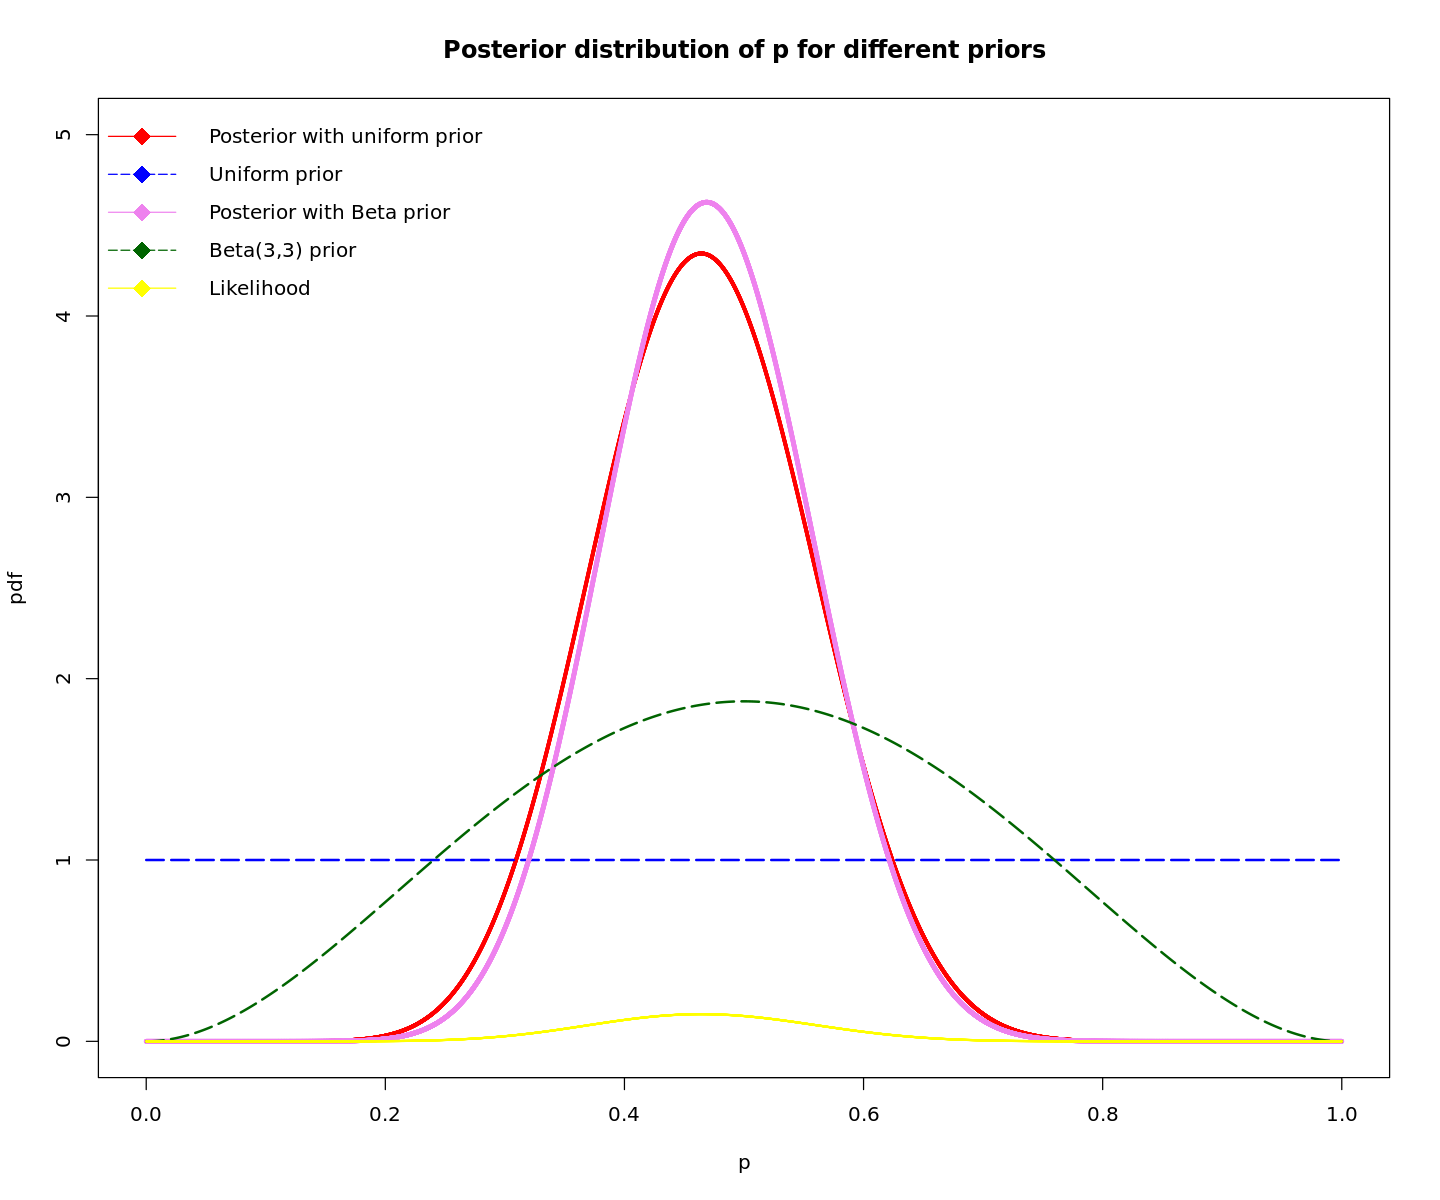

In [74]:
x=seq(0,1,by=1/10000)

p_post_unif = dbeta(x,14,16) 
unif_prior = dbeta(x,1,1)
#likel= choose(28,13)*x**13*(1-x)**15
likel= dbinom(13, size =28, prob = x)

p_post_beta = dbeta(x,16,18) 
beta_prior = dbeta(x,3,3)
#likel_beta = choose(28,13)*(p_post_beta/max(p_post_beta))**13*(1-p_post_beta/max(p_post_beta))**15

options(repr.plot.width =12, repr.plot.height = 10)


plot(x=x,y=p_post_unif,type='p',col='red',
    xlab = "p",
    cex = 0.3, 
    ylim= c(0,5),
    ylab = "pdf",
    main = "Posterior distribution of p for different priors")

lines(x=x,y=unif_prior,type='l',lty=5,col='blue', xlab = "", ylab = "",
    cex = 0.75,lwd=2)


lines(x=x,y=p_post_beta,type='p',col='violet', xlab = "", ylab = "",
    cex = 0.4,)

lines(x=x,y=beta_prior,type='l',lty=5,col='darkgreen', xlab = "", ylab = "",
    cex = 0.75,lwd=2)

lines(x=x,y=likel,type='p',col='yellow',xlab = "",cex = 0.1, ylab = "")


legend("topleft",
       legend = c("Posterior with uniform prior", "Uniform prior","Posterior with Beta prior","Beta(3,3) prior","Likelihood"),
       col = c("red", "blue","violet","darkgreen","yellow"),
       pch = c(18,18,18,18,18),
       lty = c(1,5,1,5,1),
       pt.cex = c(2,2,2,2,2),
       bty = "n")

b) Evaluate the most probable value for the coin probability p and, integrating the
posterior probability distribution, give an estimate for a 95% credibility interval.

The most likely value (mode) for the coin probability $p_H$ is:
-  $p_H = \frac{r}{n} = 13/28 \approx 0.464 $
-  $p_H = \frac{r+2}{n+4} = 15/32 \approx 0.469 $

In [43]:
# 95% credibility interval with unif prior
lower_unif <- qbeta(0.025,14,16)
upper_unif <- qbeta(0.975,14,16)
# 95% credibility interval with Beta prior
lower_beta <- qbeta(0.025,16,18)
upper_beta <- qbeta(0.975,16,18)
cat('95% credibility interval with uniform prior: [',lower_unif,';',upper_unif,']','\n')
cat('95% credibility interval with Beta(3,3) prior: [',lower_beta,';',upper_beta,']')

95% credibility interval with uniform prior: [ 0.2944856 ; 0.6430613 ] 
95% credibility interval with Beta(3,3) prior: [ 0.3079634 ; 0.6364935 ]

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the
most probable value and the credibility interval change as a function of the number
of coin tosses (i.e. from 1 to 28). 

In [1]:
x=seq(0,1,by=1/1000)
T <- 0
H <- 1
tosses <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H)

head_count <- function(n,tosses){ 
 r <- 0   
 for(i in tosses[1:n]){ 
     if(i==1){
      r <-r+1}}
     return(r)} 

posterior <- function(r,n,alfa_in,beta_in){ 
    post <- dbeta(x,alfa_in+r,beta_in+n-r) 
    return(post)}

cum_r <- c()

for (i in 1:length(tosses)){
    cum_r <- c(cum_r,head_count(i,tosses))}

# uniform prior
alfa_unif <- 1
beta_unif <-1 

post_list <- list()
post_list[[1]] <- dbeta(x,alfa_unif,beta_unif) 
for (i in 1:(length(tosses)-1)){ 
    post_list[[i+1]] <- posterior(cum_r[i],i+1,alfa_unif,beta_unif)}

modes_list <- list() #list with the most likely value for p_H after every toss 
modes_list[[1]] <- 0.5
for (i in 1:(length(tosses)-1)){ 
    modes_list[[i+1]] <- cum_r[i+1]/(i+1)}

upper_unif_list <- list()
upper_unif_list[[1]] <- 0.975
for (i in 1:(length(tosses)-1)){ 
    upper_unif_list[[i+1]] <- qbeta(0.975,alfa_unif+cum_r[i+1],beta_unif+i+1-cum_r[i+1])}

lower_unif_list <- list()
lower_unif_list[[1]] <- 0.025
for (i in 1:(length(tosses)-1)){ 
    lower_unif_list[[i+1]] <- qbeta(0.025,alfa_unif+cum_r[i+1],beta_unif+i+1-cum_r[i+1])}

#beta prior

alfa <- 3
beta <- 3

post_beta_list <- list()
post_beta_list[[1]] <- dbeta(x,alfa,beta)
for (i in 1:(length(tosses)-1)){ 
    post_beta_list[[i+1]] <- posterior(cum_r[i],i+1,alfa,beta)}

modes_beta_list <- list() # list with the most likely value for p_H after every toss 
modes_beta_list[[1]] <- 0.5
for (i in 1:(length(tosses)-1)){ 
    modes_beta_list[[i+1]] <- (cum_r[i+1]+alfa-1)/(alfa+beta+i+1-2)}

upper_beta_list <- list()
upper_beta_list[[1]] <- 0.975
for (i in 1:(length(tosses)-1)){ 
    upper_beta_list[[i+1]] <- qbeta(0.975,alfa+cum_r[i+1],beta+i+1-cum_r[i+1])}

lower_beta_list <- list()
lower_beta_list[[1]] <- 0.025
for (i in 1:(length(tosses)-1)){ 
    lower_beta_list[[i+1]] <- qbeta(0.025,alfa+cum_r[i+1],beta+i+1-cum_r[i+1])}


- Initial uniform prior:

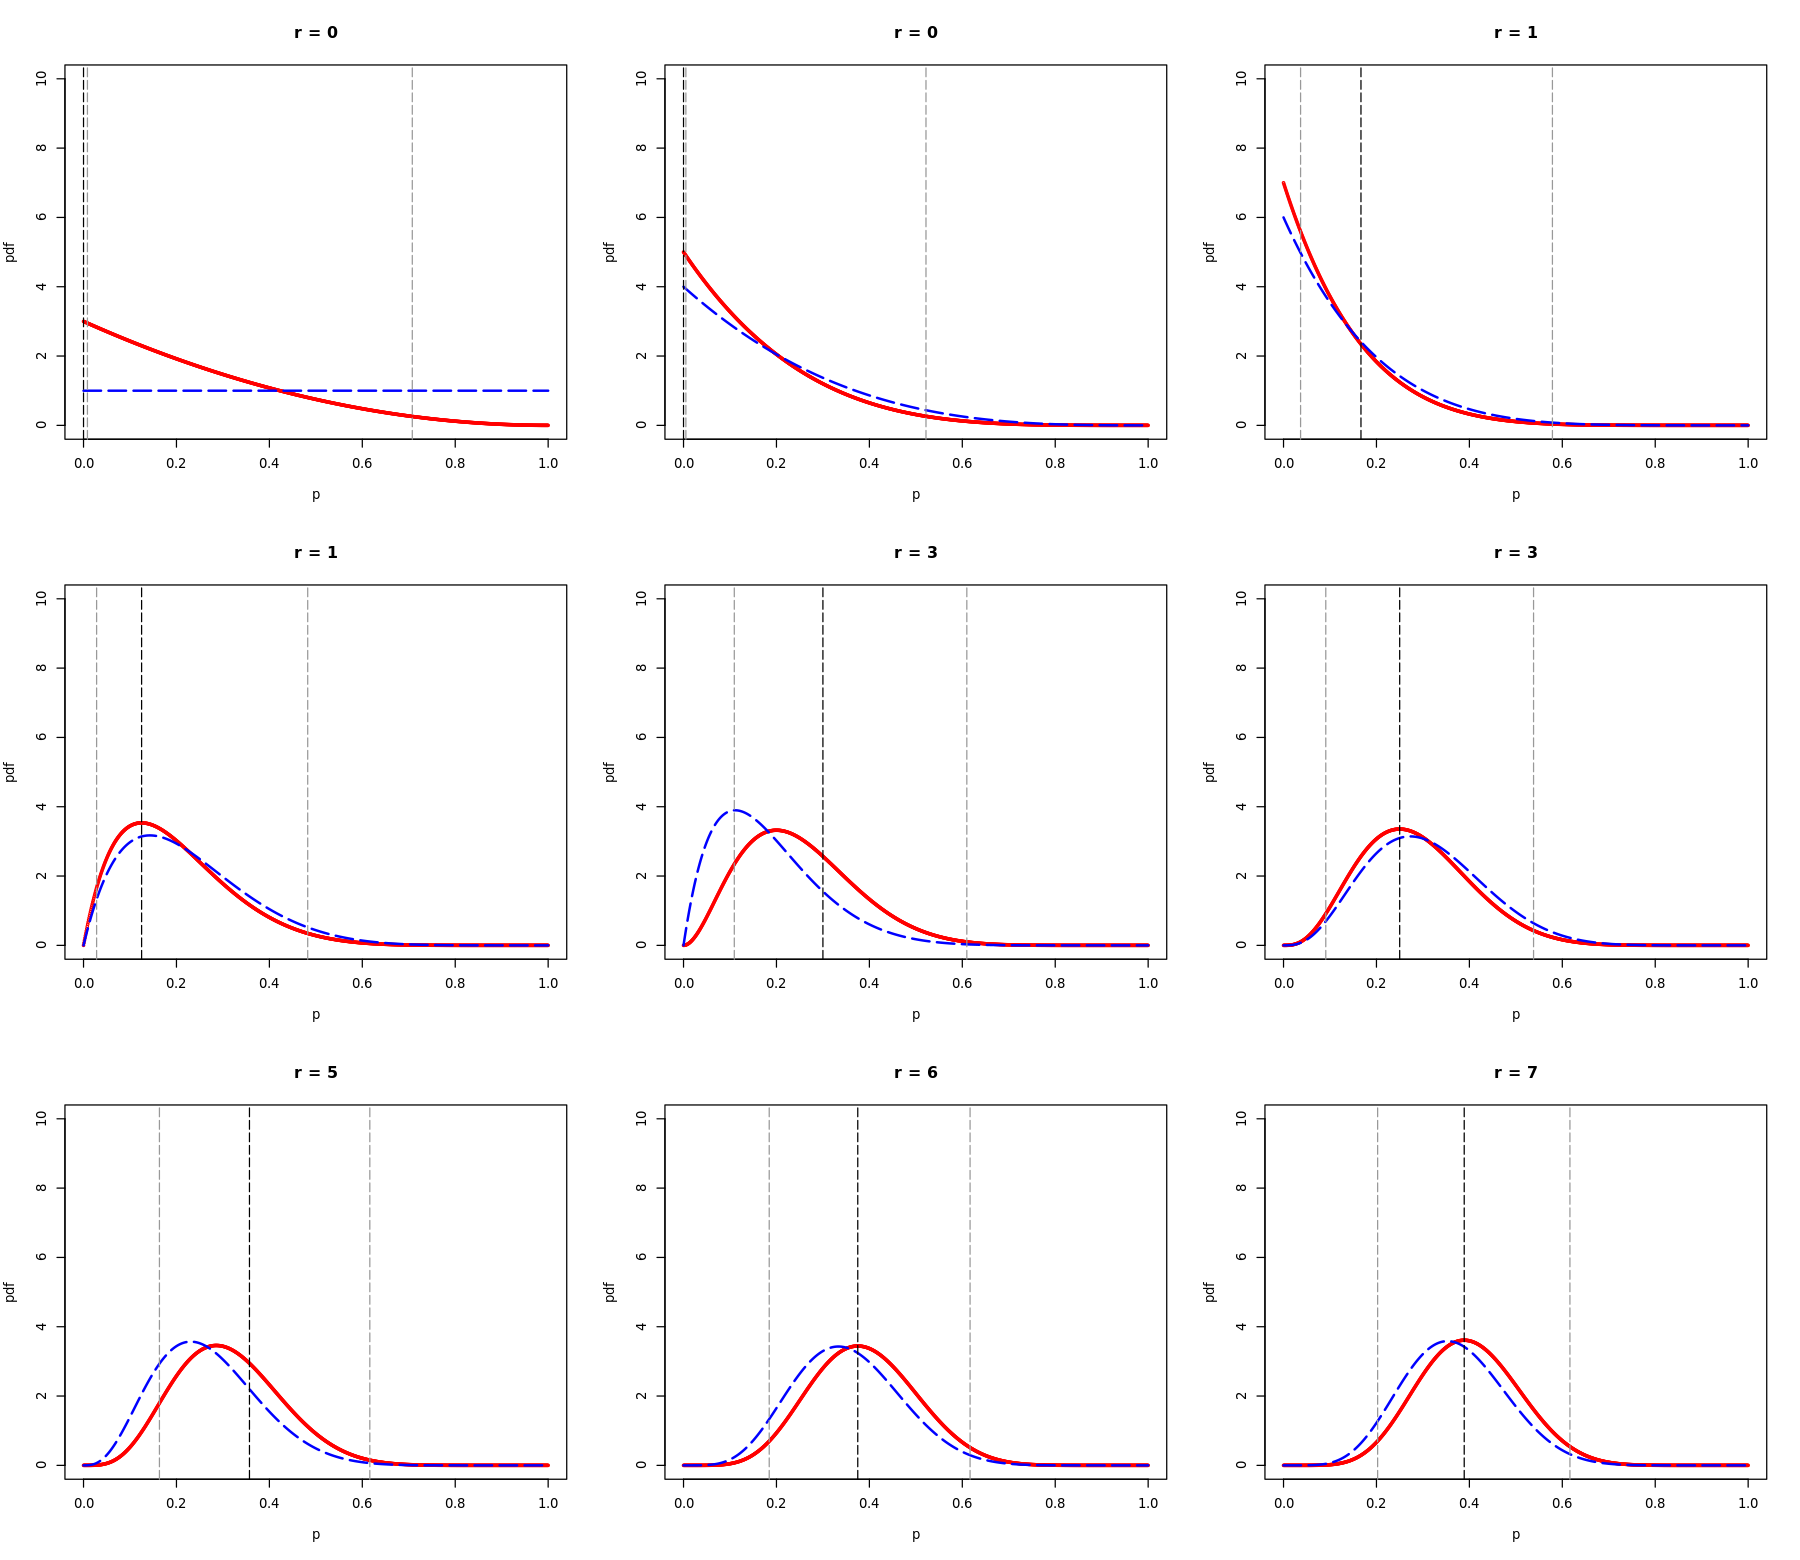

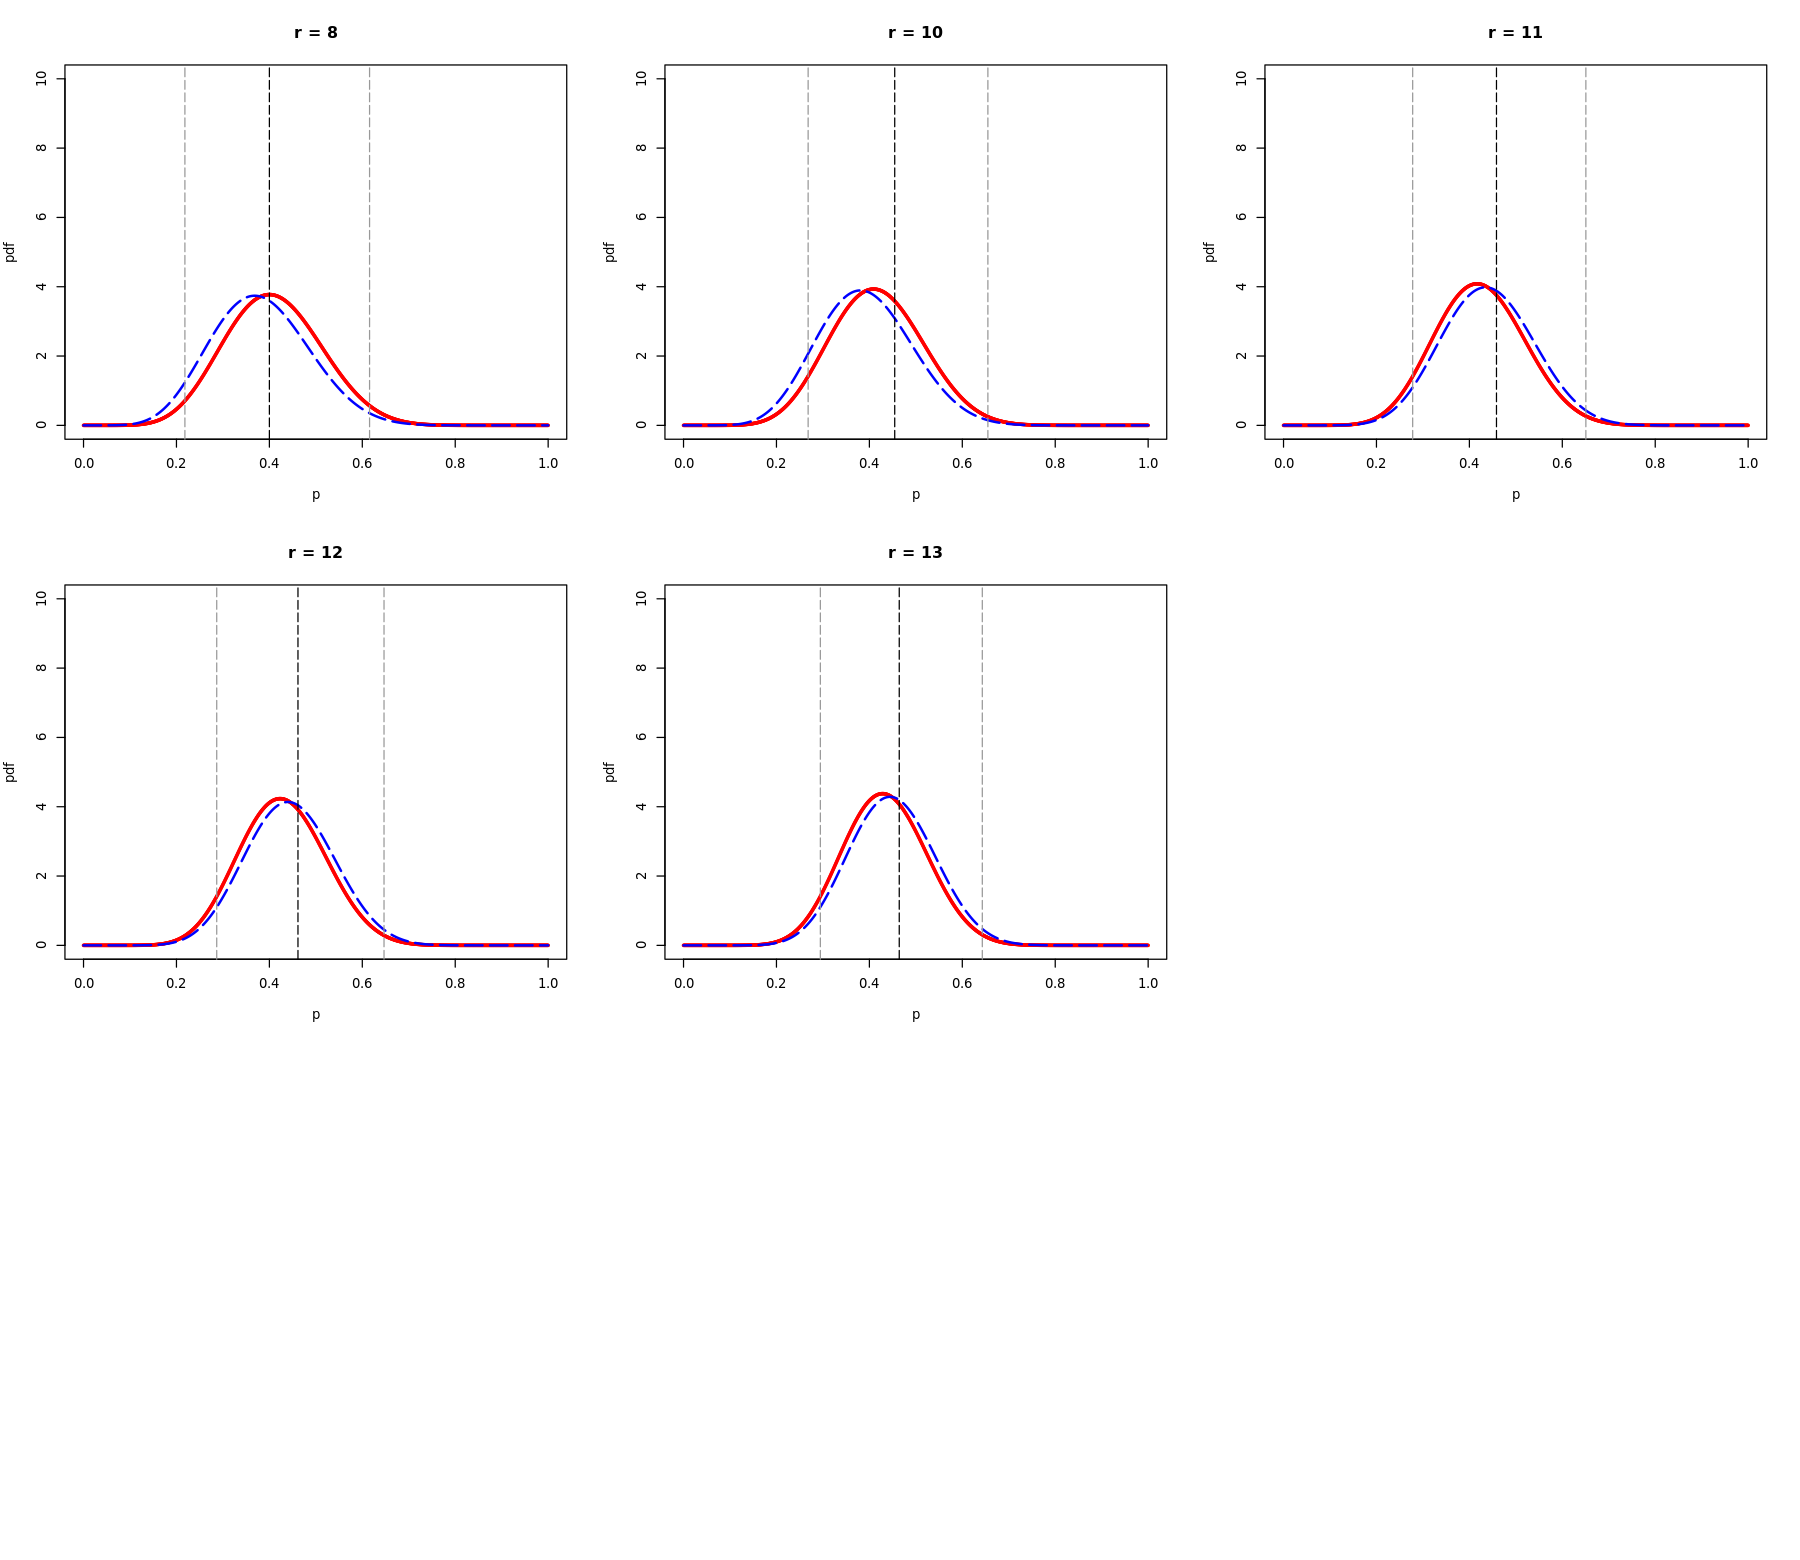

In [3]:
par(mfrow=c(3,3))
options(repr.plot.width = 15, repr.plot.height = 13)

for(i in 1:length(post_list)){ 
    if( i%%2 == 0 || i==length(post_list)){ 
   plot(x=x,y=post_list[[i]],type='p',col='red',
    xlab = "p",
    cex = 0.4, 
    ylim= c(0,10),
    ylab = "pdf",
    main = paste("r =",cum_r[i])) 
    lines(x=x,y=post_list[[i-1]],type='l',lty=5,col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
    abline(v=modes_list[[i]], col="black", lty=5,cex=0.5)
    abline(v=lower_unif_list[[i]], col="gray60", lty=5,cex=0.5)
    abline(v=upper_unif_list[[i]], col="gray60", lty=5,cex=0.5)
    }} 

- Initial $Beta(3,3)$ prior:

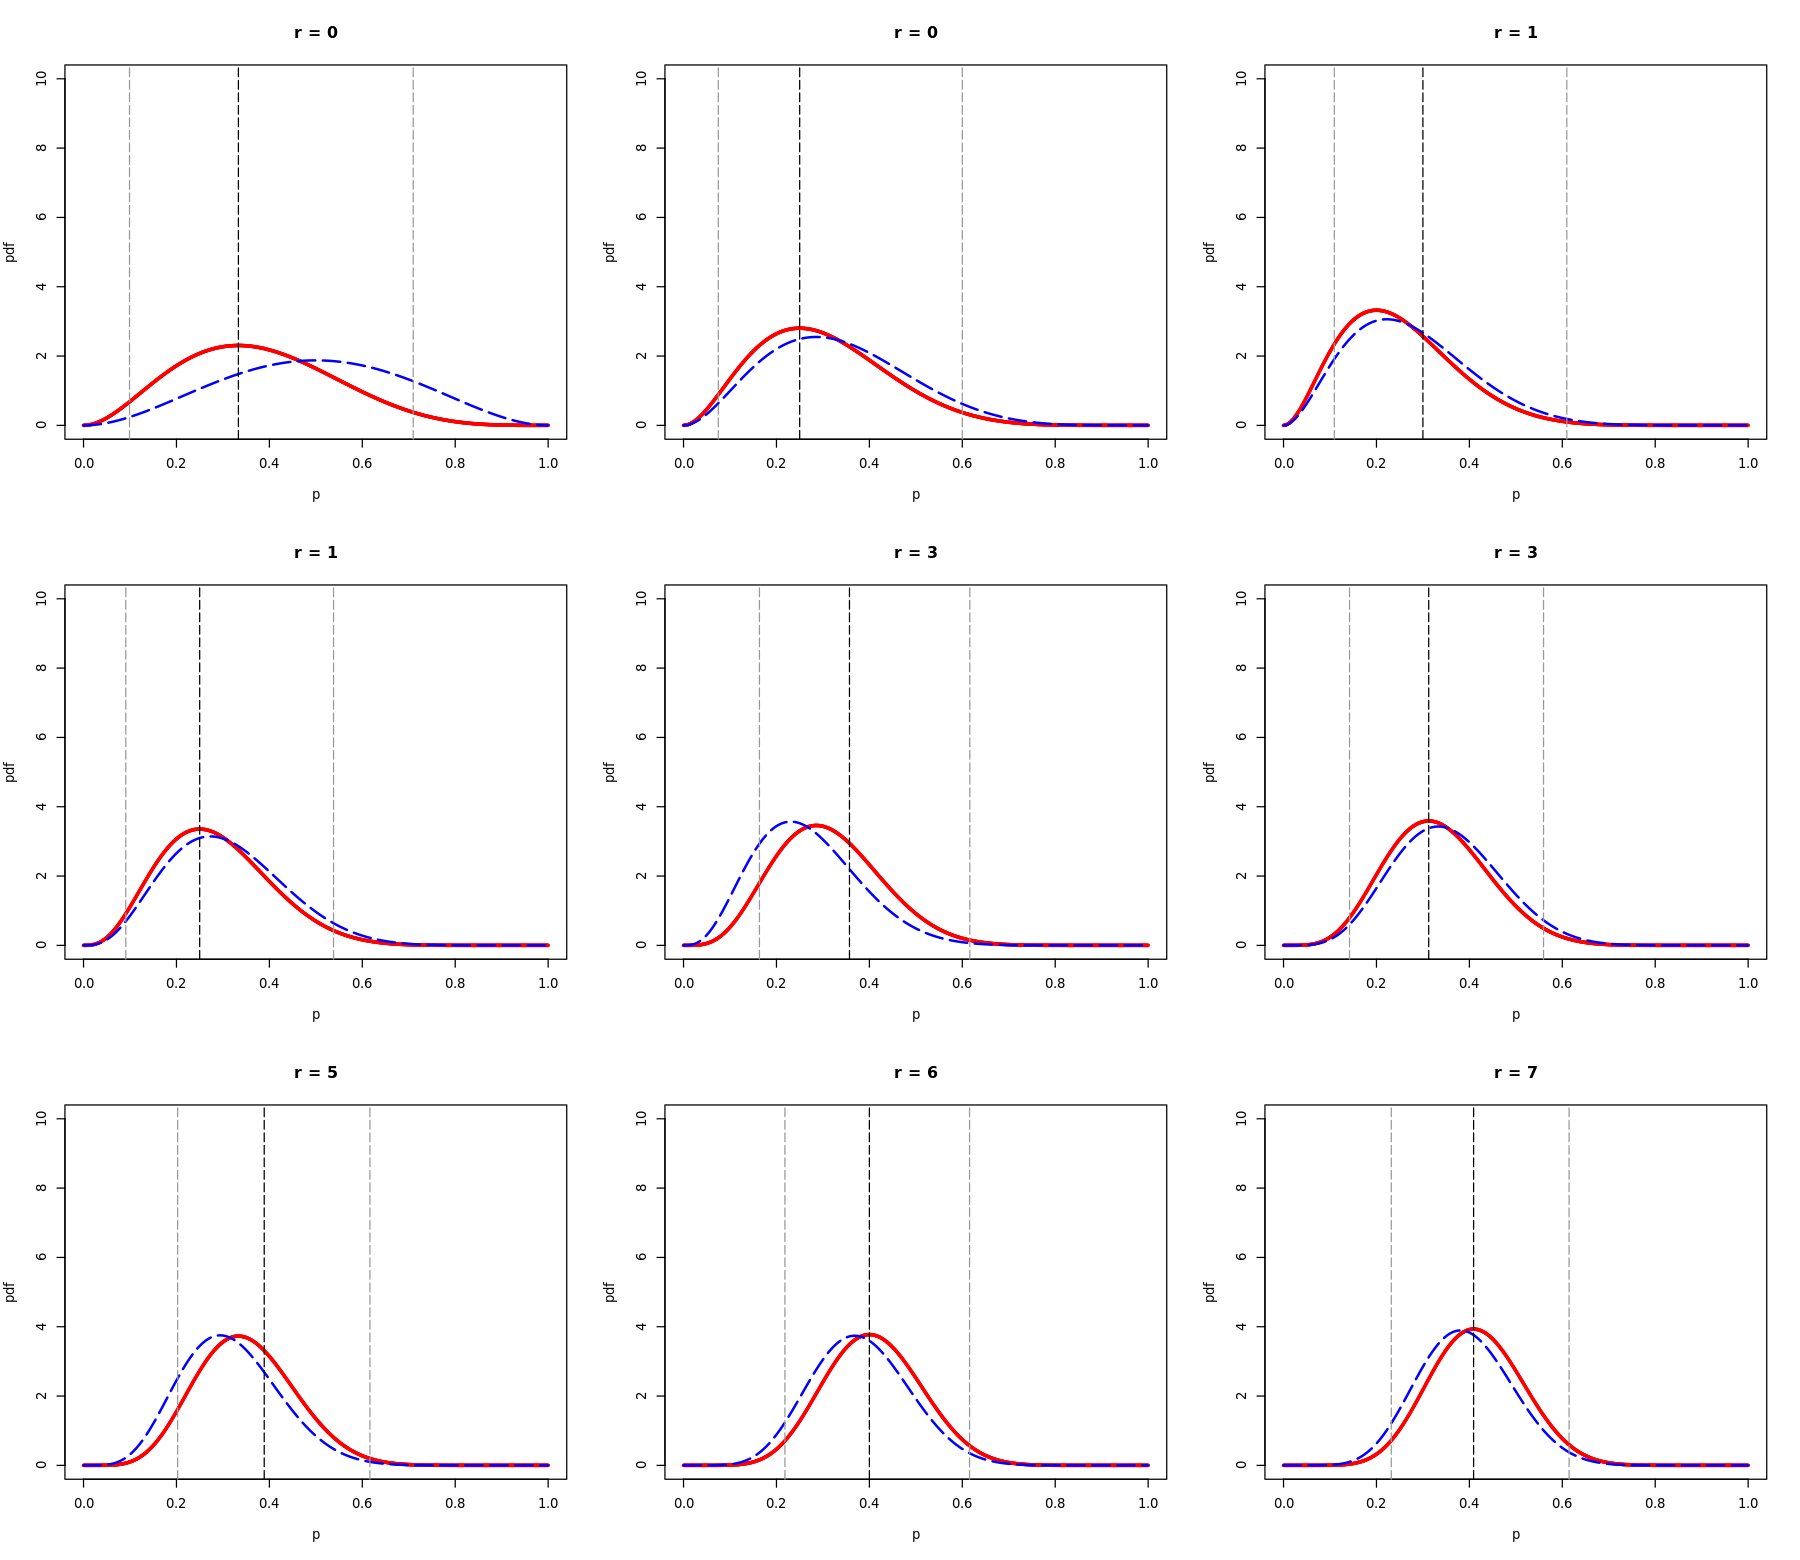

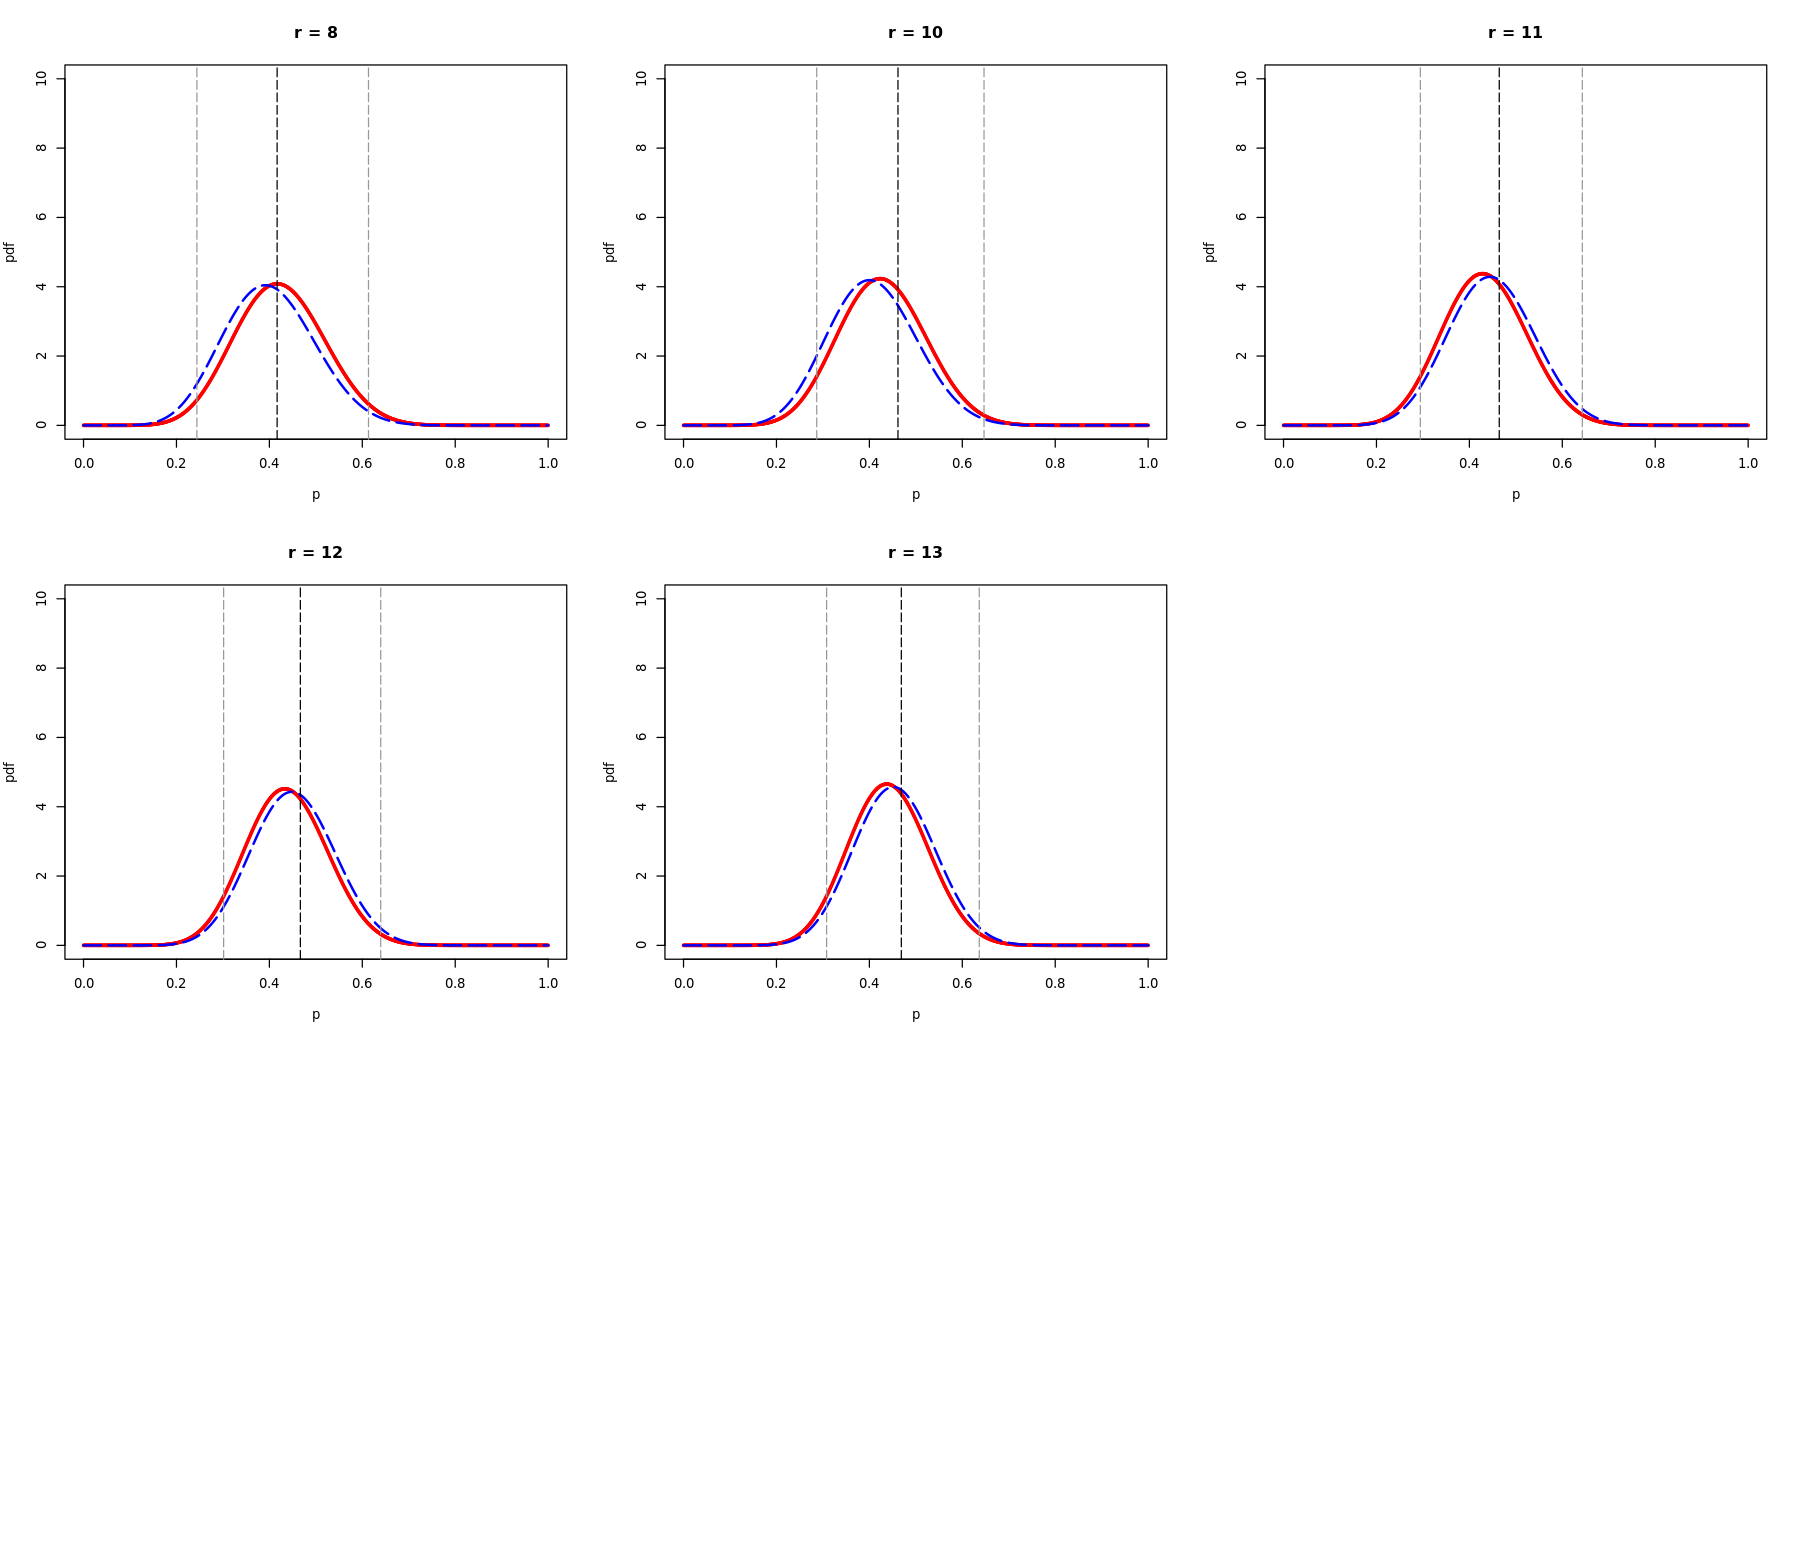

In [4]:
par(mfrow=c(3,3))
options(repr.plot.width = 15, repr.plot.height = 13)

for(i in 1:length(post_list)){ 
    if( i%%2 == 0 || i==length(post_list)){ 
   plot(x=x,y=post_beta_list[[i]],type='p',col='red',
    xlab = "p",
    cex = 0.4, 
    ylim= c(0,10),
    ylab = "pdf",
    main = paste("r =",cum_r[i])) 
    lines(x=x,y=post_beta_list[[i-1]],type='l',lty=5,col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
    abline(v=modes_beta_list[[i]], col="black", lty=5,cex=0.5)
    abline(v=lower_beta_list[[i]], col="gray60", lty=5,cex=0.5)
    abline(v=upper_beta_list[[i]], col="gray60", lty=5,cex=0.5)
    }} 

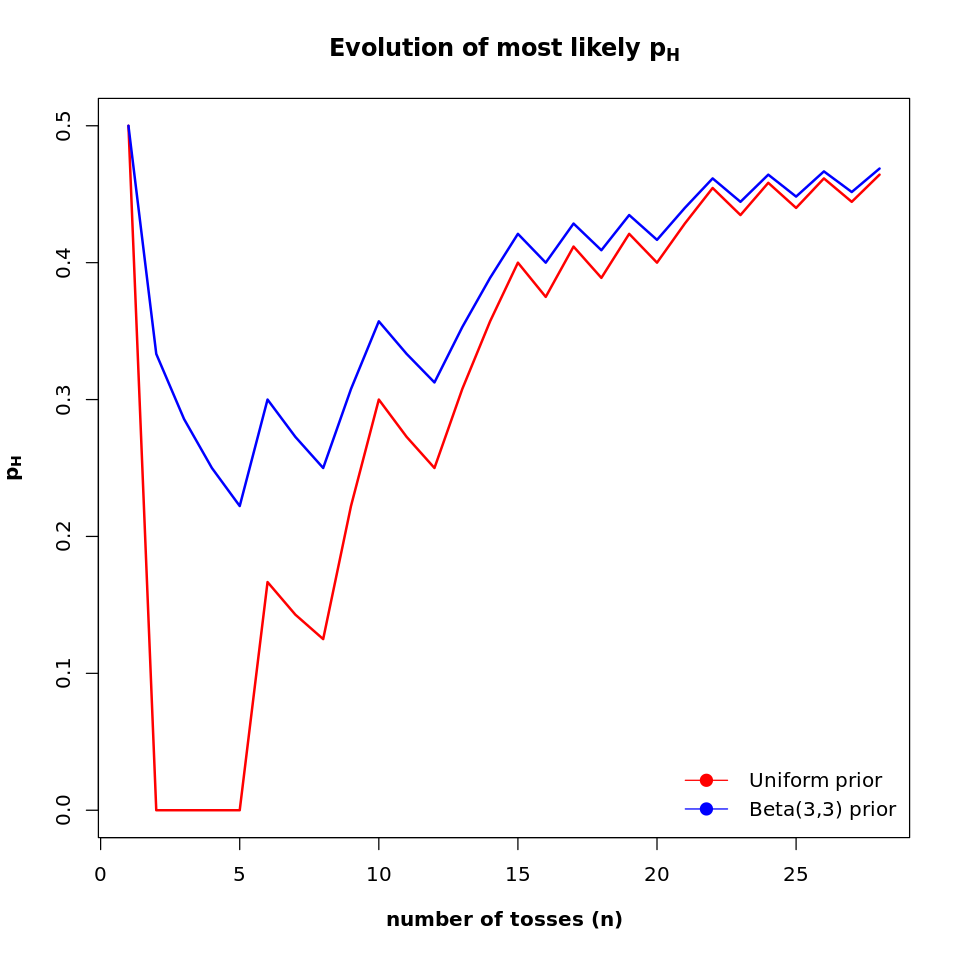

In [6]:
# plot of how the most likely p_H value evolves during tosses
options(repr.plot.width = 8, repr.plot.height = 8)
plot(x=1:length(tosses),y=modes_list,type='l',col='red',
    xlab = expression(bold("number of tosses (n)")),
    cex = 0.75,
    ylab =  expression(bold(p[H])),lwd=2,
    main = expression(bold("Evolution of most likely " * p[H]))) 
lines(x=1:length(tosses),y=modes_beta_list,type='l',col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
legend("bottomright",
       legend = c("Uniform prior", "Beta(3,3) prior"),
       col = c("red", "blue"),
       pch = c(20,20),
       lty = c(1,1),
       pt.cex = c(2,2),
       bty = "n")

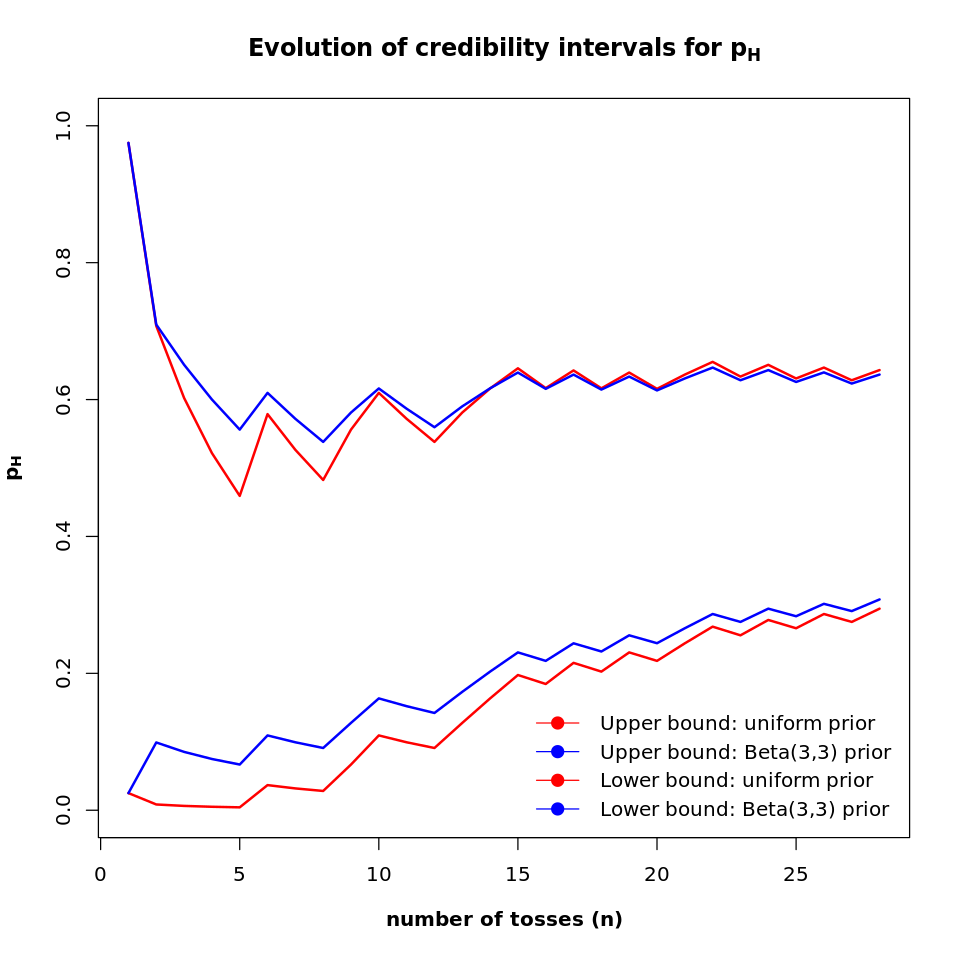

In [7]:
# plot of how the credibility interval for p_H evolves during tosses

plot(x=1:length(tosses),y=upper_unif_list,type='l',col='red',
    xlab = expression(bold("number of tosses (n)")),
    cex = 0.75,
    ylim = c(0,1),
    ylab =  expression(bold(p[H])),lwd=2,
    main = expression(bold("Evolution of credibility intervals for " * p[H]))) 
lines(x=1:length(tosses),y=upper_beta_list,type='l',col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
lines(x=1:length(tosses),y=lower_unif_list,type='l',col='red', xlab = "", ylab = "",cex = 0.75,lwd=2)
lines(x=1:length(tosses),y=lower_beta_list,type='l',col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
legend("bottomright",
       legend = c("Upper bound: uniform prior", "Upper bound: Beta(3,3) prior","Lower bound: uniform prior","Lower bound: Beta(3,3) prior"),
       col = c("red", "blue","red", "blue"),
       pch = c(20,20,20,20),
       lty = c(1,1,1,1),
       pt.cex = c(2,2,2,2),
       bty = "n")

d) Do you get a different result, by analysing the data sequentially with respect to a
one-step analysis (i.e. considering all the data as a whole) ? \
As expected, the overall results for the most likely $p_H$ and its credibility interval coincide using the two methods:

In [194]:
cat("Most likely values with sequential method and overall method, Uniform prior:",modes_list[[28]], 13/28,"\n")
cat("Most likely values with sequential method and overall method, Beta prior:",modes_beta_list[[28]], 15/32,"\n")

cat("Upper bound values with sequential method and overall method, Unif prior:",upper_unif, upper_unif_list[[28]],"\n")
cat("Lower bound values with sequential method and overall method, Unif prior:",lower_unif, lower_unif_list[[28]],"\n")

cat("Upper bound values with sequential method and overall method, Beta prior:",upper_beta,upper_beta_list[[28]],"\n")
cat("Lower bound values with sequential method and overall method, Beta prior:",lower_beta,lower_beta_list[[28]])

Most likely values with sequential method and overall method, Uniform prior: 0.4642857 0.4642857 
Most likely values with sequential method and overall method, Beta prior: 0.46875 0.46875 
Upper bound values with sequential method and overall method, Unif prior: 0.6430613 0.6430613 
Lower bound values with sequential method and overall method, Unif prior: 0.2944856 0.2944856 
Upper bound values with sequential method and overall method, Beta prior: 0.6364935 0.6364935 
Lower bound values with sequential method and overall method, Beta prior: 0.3079634 0.3079634

## Exercise 4:  Poll
A couple of days before an election in which four parties (A,B,C,D) compete, a poll is
taken using a sample of 200 voters who express the following preferences 57, 31, 45 and 67
for, respectively, parties A,B,C and D.
Using a Bayesian approach, for all parties, calculate the expected percentage of votes and a 68% credibility interval by assuming
as prior a: \
– Uniform prior

We can model the process, for each parties' expressed preferences, as a Bernoulli process with $n=200$ number of trials and $r_i=57,31,45,76$ successes respectively for party A,B,C,D. We have to infer a 68% credibility interval for the porbability $p_i$ of success (voting for the i-th party). 

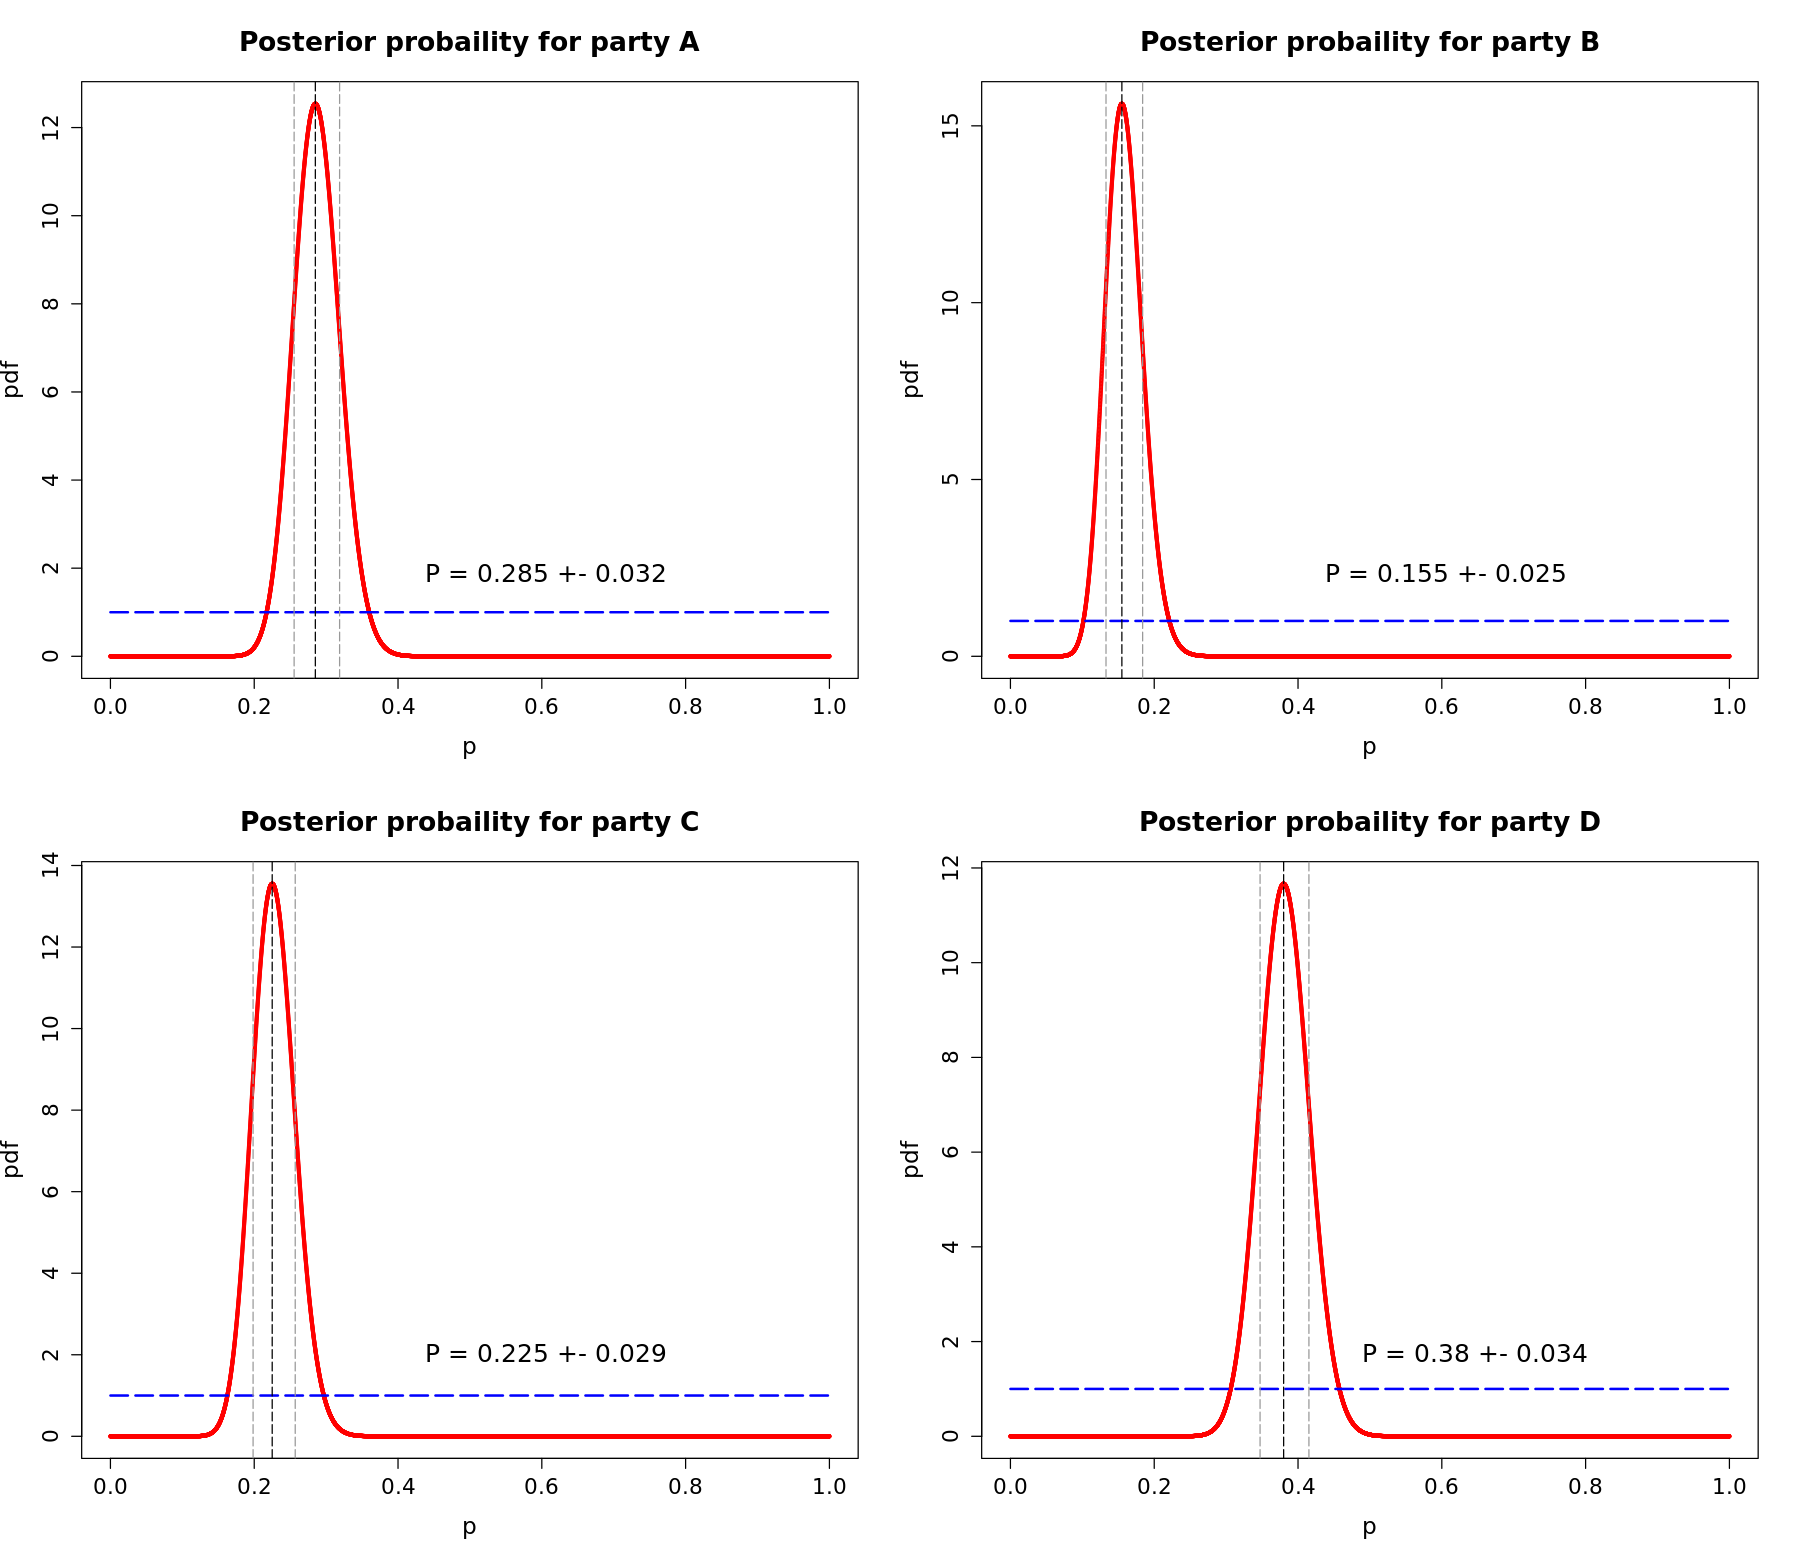

In [58]:
x= seq(0,1,by=0.0001)

unif_prior= dbeta(x,1,1)

r= c(57,31,45,76)
party= c('A','B','C','D')
posteriors = list()
for(i in 1:length(r)){
    posteriors[[i]] = dbeta(x,1+r[i],1+200-r[i])
}

modes = list()
upper_lim = list() 
lower_lim = list()
for(i in 1:length(r)){
    modes[[i]] = r[i]/200
    upper_lim[[i]] = qbeta(0.84,1+r[i],1+200-r[i])
    lower_lim[[i]] = qbeta(0.16,1+r[i],1+200-r[i])}


par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 13)

for(i in 1:length(posteriors)){ 
   plot(x=x,y=posteriors[[i]],type='p',col='red',
    xlab = "p",
    cex = 0.4, 
    ylab = "pdf",
    cex.main = 1.6,    # main title size
     cex.lab = 1.4,     # axis label size
     cex.axis = 1.3,
    main = paste("Posterior probaility for party",party[i])) 
    lines(x=x,y=unif_prior,type='l',lty=5,col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
    abline(v=modes[[i]], col="black", lty=5,cex=0.5)
    abline(v=upper_lim[[i]], col="gray60", lty=5,cex=0.5)
    abline(v=lower_lim[[i]], col="gray60", lty=5,cex=0.5)
    legend("bottomright",
       legend = paste("P =",round(modes[[i]],3),"+-",round((upper_lim[[i]]-lower_lim[[i]])/2,3)),
       col = c("red"),
       pt.cex = 2,
       bty = "n",
       cex = 1.5,         # legend text size
       inset = c(-0.2, 0.05))
    
    }

– A prior constructed from the results obtained from another poll conducted the
previous week on a sample of 100 voters who expressed the following preferences
32,14,26,28 for, respectively, parties A,B,C and D.

We assume a uniform prior $Beta(1,1)$ to infere the posterior of the previos poll conducted on 100 people, to be then used as prior to infere the posterior of the last poll conducted on 200 people. 

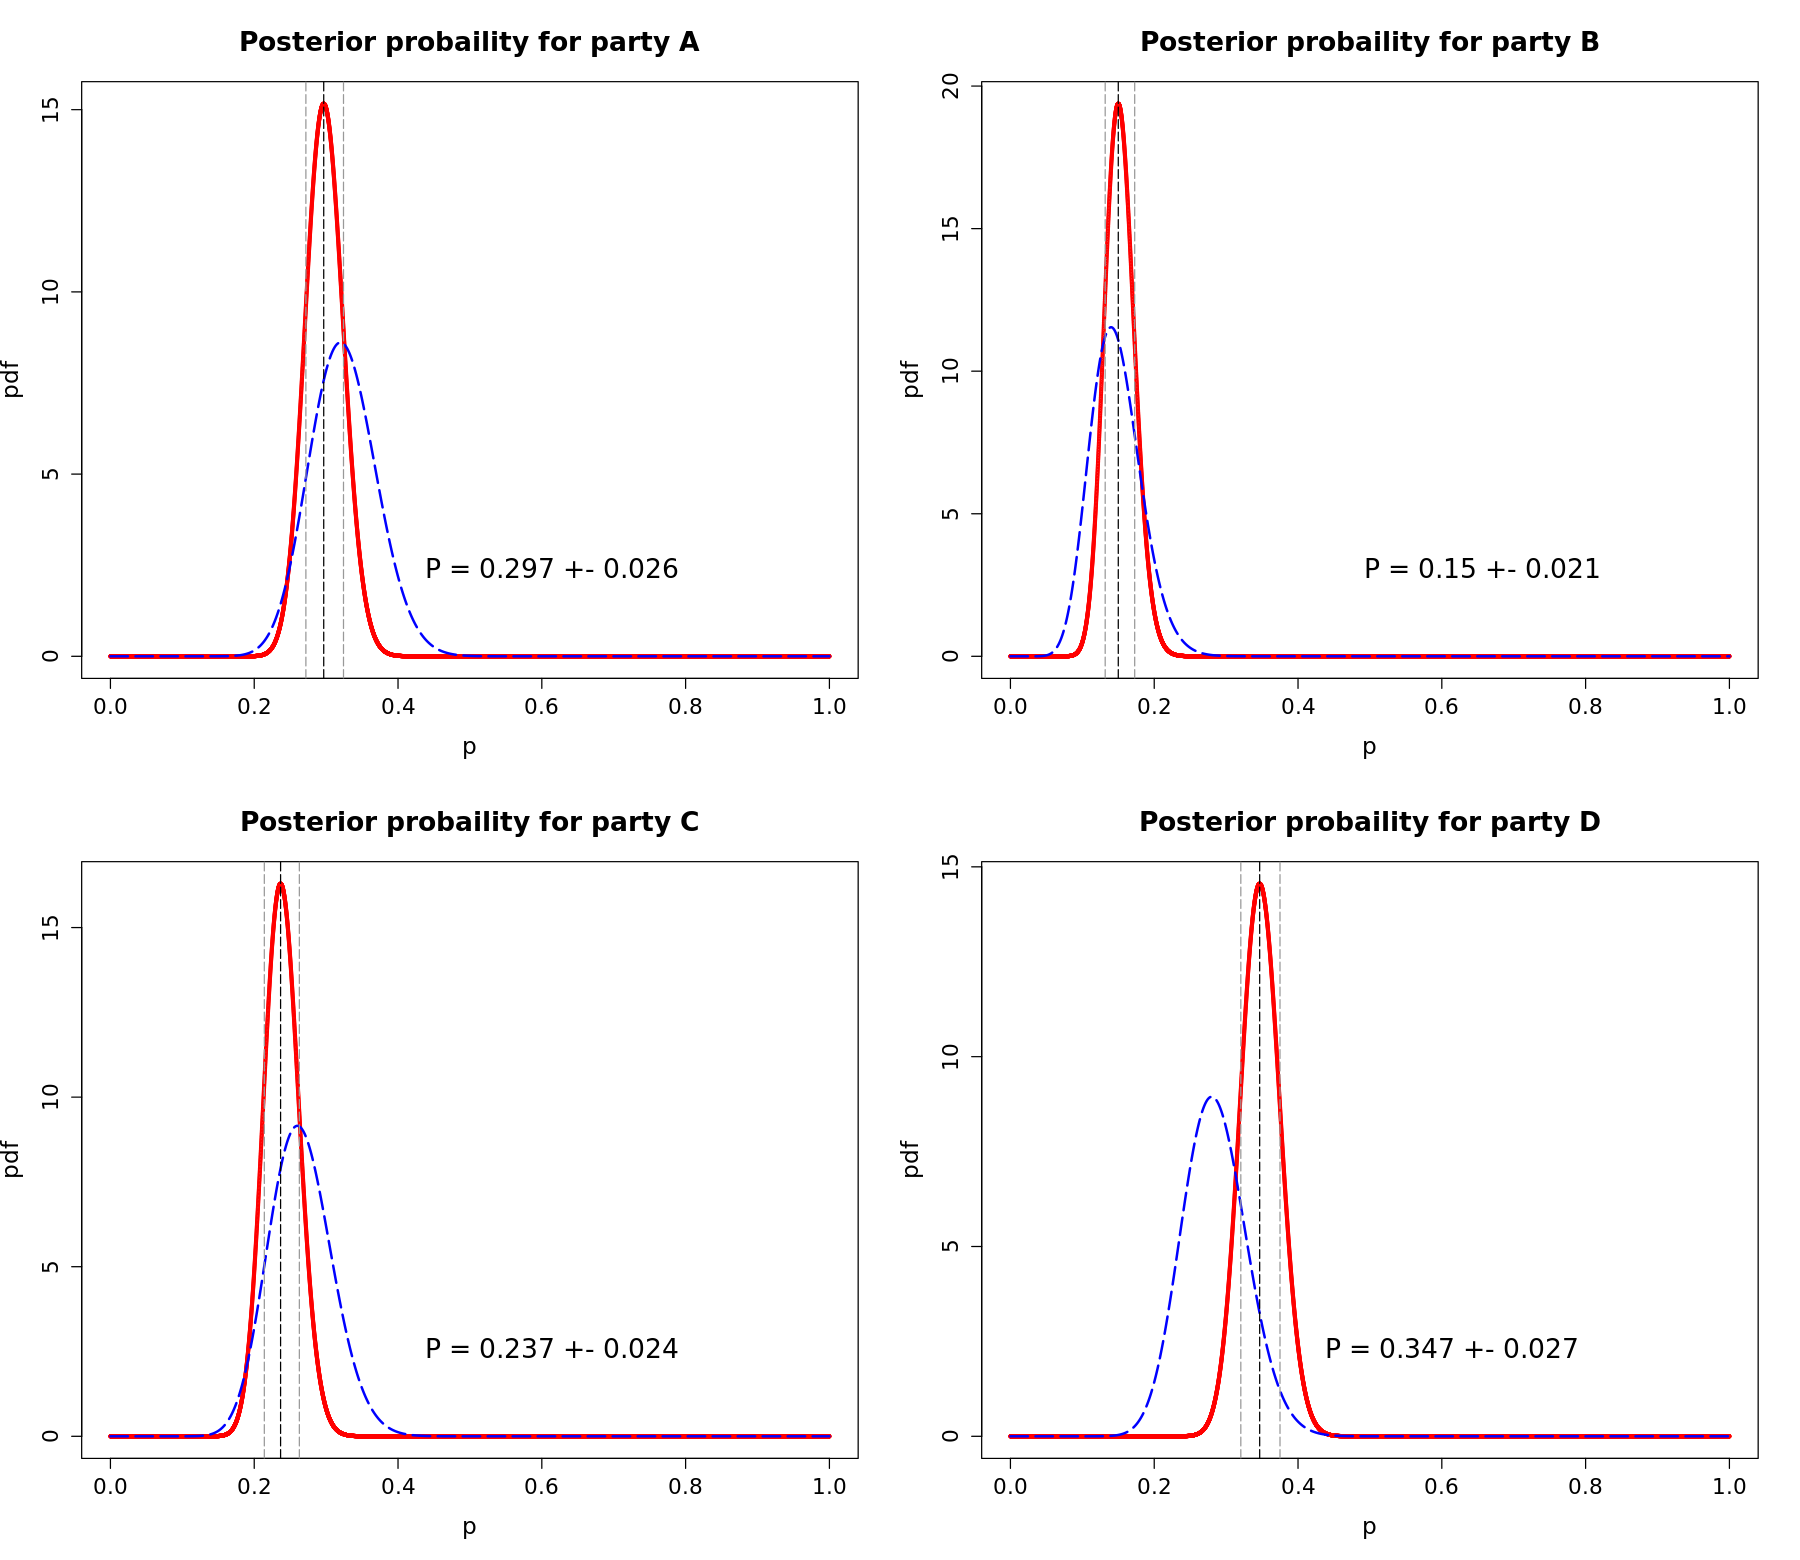

In [70]:
prev_r = c(32,14,26,28)

priors = list() # priors of the second poll (posteriors from the first poll)
alpha_i= list()
for(i in 1:length(prev_r)){
    alfa_i[[i]] = 1+prev_r[i]
    beta_i[[i]] = 1+100-prev_r[i]
    priors[[i]] = dbeta(x,alfa_i[[i]],beta_i[[i]])
}

new_posteriors = list()
for(i in 1:length(r)){
    new_posteriors[[i]] = dbeta(x,alfa_i[[i]]+r[i],beta_i[[i]]+200-r[i])}

new_modes = list()
new_upper_lim = list() 
new_lower_lim = list()
for(i in 1:length(r)){
    new_modes[[i]] = (alfa_i[[i]]+r[i]-1)/(alfa_i[[i]]+beta_i[[i]]+200-2)
    new_upper_lim[[i]] = qbeta(0.84,alfa_i[[i]]+r[i],beta_i[[i]]+200-r[i])
    new_lower_lim[[i]] = qbeta(0.16,alfa_i[[i]]+r[i],beta_i[[i]]+200-r[i])}

par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 13)

for(i in 1:length(new_posteriors)){ 
   plot(x=x,y=new_posteriors[[i]],type='p',col='red',
    xlab = "p",
    cex = 0.4, 
    ylab = "pdf",
    cex.main = 1.6,  
     cex.lab = 1.4,    
     cex.axis = 1.3,
    main = paste("Posterior probaility for party",party[i])) 
    lines(x=x,y=priors[[i]],type='l',lty=5,col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
    abline(v=new_modes[[i]], col="black", lty=5,cex=0.6)
    abline(v=new_upper_lim[[i]], col="gray60", lty=5,cex=0.6)
    abline(v=new_lower_lim[[i]], col="gray60", lty=5,cex=0.6)
    legend("bottomright",
       legend = paste("P =",round(new_modes[[i]],3),"+-",round((new_upper_lim[[i]]-new_lower_lim[[i]])/2,3)),
       col = c("red"),
       pt.cex = 2,
       bty = "n",
       cex = 1.6,         
       inset = c(-0.25, 0.05)) }
